In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
from scipy import stats

from keras_transfer_learning.utils import visualize, utils
visualize.set_default_plotting_tex()

Using TensorFlow backend.
/home/benjamin/miniconda3/envs/bachelorthesis/lib/python3.6/site-packages/classification_models/resnext/__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

## Utils

In [6]:
facetgrid_kwargs = dict(height=1.92, aspect=1, # 1.92 inches wide and high
                        palette=sns.color_palette(),
                        )
catplot_kwargs = dict(size=2,                # Size of the dots
                      dodge=True,            # Seperate hues
                      **facetgrid_kwargs
                      )

def exp_regex(exps):
    return '|'.join([f'((R/none|P/{p})/{d}/{h}/{b}/.*)' for p, d, h, b in exps])

def convert_to_categorical(df):
    df['Data'] = df['Data'].astype('category')
    df['Pretraining Data'] = df['Pretraining Data'].astype('category')
    df['Backbone'] = df['Backbone'].astype('category')
    return df

def rename_datasets(df):
    data_name_map = {
        'hl60low': 'HL60_LOW_NOISE',
        'hl60high': 'HL60_HIGH_NOISE',
        'granulocyte': 'GRANULOCYTE',
        'dsb2018': 'DSB2018',
        'stardist-dsb2018': 'STARDIST_DSB2018',
        'imagenet': 'IMAGENET',
        'cityscapes': 'CITYSCAPES',
        'hl60low-hl60high-granulocyte': 'SIMULATED',
        'hl60low-granulocyte-aug': 'SIMULATED_AUG',
    }
    df['Data'] = df['Data'].cat.rename_categories(data_name_map)
    df['Pretraining Data'] = df['Pretraining Data'].cat.rename_categories(data_name_map)
    return df

def rename_backbones(df):
    backbone_name_map = {
        'unet': 'U-Net',
        'resnet-unet': 'Res-U-Net',
        'plain-unet': 'Plain-U-Net',
        'imagnet-resnet-unet': 'ResNet50-U-Net',
    }
    df['Backbone'] = df['Backbone'].cat.rename_categories(backbone_name_map)
    return df

def fill_pretrain_data(df):
    results_random = df[df['Pretraining Data'].isnull()]
    pretrain_datas = [c for c in df['Pretraining Data'].unique() if c is not None]
    results_random_filled = [results_random[results_random['Data'] != d].fillna(d) for d in pretrain_datas]

    df = df[df['Pretraining Data'].notnull()]
    for d in results_random_filled:
        df = df.append(d)
    return df

def add_joined_data_col(df):
    df['Joined Data'] = df[['Data', 'Pretraining Data']].apply(
        lambda x: f'Pretraining: {x[1]}\nData: {x[0]}', axis=1)
    return df

# Experiment "resunet"

In [9]:
exp_reg = utils.model_name_regex(prefix='R', pre_data='none', data=['stardist-dsb2018', 'dsb2018'],
                                 head='stardist', backbone=['unet', 'resnet-unet', 'plain-unet'],
                                 num_train='F')
selected_models = visualize.get_models(exp_reg)
results_last_df = visualize._get_results_last_df(selected_models, 'ap_dsb2018#mean')

results_last_df = convert_to_categorical(results_last_df)
results_last_df = rename_datasets(results_last_df)
results_last_df = rename_backbones(results_last_df)

current_catplot_kwags = dict(catplot_kwargs)
current_catplot_kwags['aspect'] = 1.3
g = visualize.catplot(
    data=results_last_df,
    col='Data',
    y='mAP', x='Backbone',
    col_order=['STARDIST_DSB2018', 'DSB2018'],
    sharey=False, margin_titles=False, legend_out=True,
    **current_catplot_kwags
)
plt.subplots_adjust(wspace=0.3)

g.savefig('/tmp/bachelorthesis-plots-tex/exp_resunet_scores.pdf', bbox_inches='tight')

In [26]:
exp_reg = utils.model_name_regex(prefix='R', pre_data='none', data=['stardist-dsb2018'],
                                       head='stardist', backbone=['unet', 'resnet-unet'], num_train='F')
selected_models = visualize.get_models(exp_reg)
visualize._get_results_last_df(selected_models) \
    .groupby('Backbone') \
    .mean() \
    .filter(regex='ap_dsb2018.*', axis=1) \
    .round(decimals=3)

ap_dsb2018#0.50  ap_dsb2018#0.55  ap_dsb2018#0.60  \
Backbone                                                         
resnet-unet            0.870            0.847            0.823   
unet                   0.868            0.850            0.823   

             ap_dsb2018#0.65  ap_dsb2018#0.70  ap_dsb2018#0.75  \
Backbone                                                         
resnet-unet            0.782            0.725            0.637   
unet                   0.786            0.726            0.639   

             ap_dsb2018#0.80  ap_dsb2018#0.85  ap_dsb2018#0.90  \
Backbone                                                         
resnet-unet            0.527            0.383            0.193   
unet                   0.524            0.364            0.158   

             ap_dsb2018#0.95  ap_dsb2018#mean  
Backbone                                       
resnet-unet            0.023            0.581  
unet                   0.009            0.575

In [27]:
exp_reg = utils.model_name_regex(prefix='R', pre_data='none', data=['dsb2018'],
                                       head='stardist', backbone=['unet', 'resnet-unet'], num_train='F')
selected_models = visualize.get_models(exp_reg)
visualize._get_results_last_df(selected_models) \
    .groupby('Backbone') \
    .mean() \
    .filter(regex='ap_dsb2018.*', axis=1) \
    .round(decimals=3)

ap_dsb2018#0.50  ap_dsb2018#0.55  ap_dsb2018#0.60  \
Backbone                                                         
resnet-unet            0.666            0.645            0.621   
unet                   0.631            0.609            0.585   

             ap_dsb2018#0.65  ap_dsb2018#0.70  ap_dsb2018#0.75  \
Backbone                                                         
resnet-unet            0.591            0.557            0.501   
unet                   0.554            0.510            0.450   

             ap_dsb2018#0.80  ap_dsb2018#0.85  ap_dsb2018#0.90  \
Backbone                                                         
resnet-unet            0.431            0.328            0.185   
unet                   0.374            0.261            0.123   

             ap_dsb2018#0.95  ap_dsb2018#mean  
Backbone                                       
resnet-unet            0.030            0.455  
unet                   0.007            0.410

# Experiment "noise": Different Noise Levels

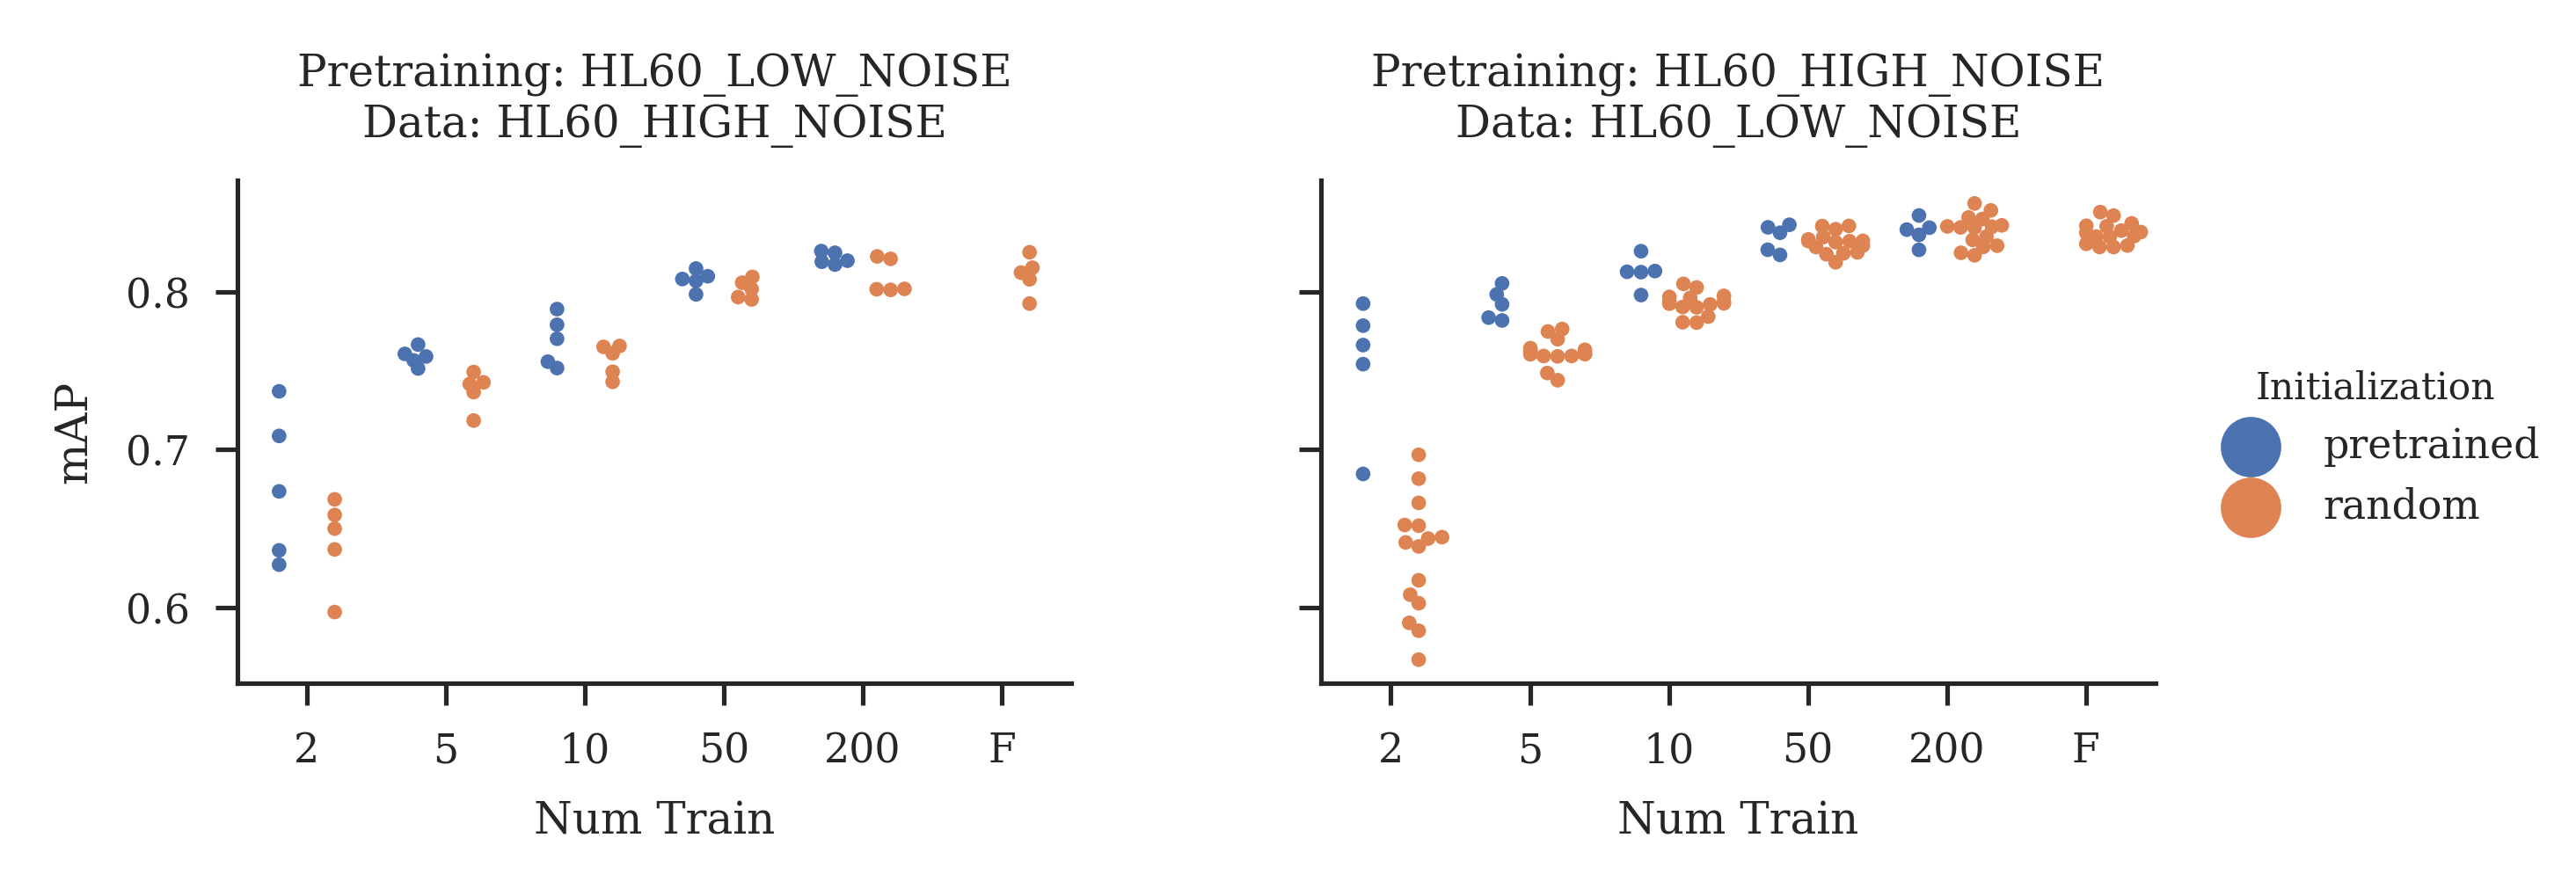

In [49]:
exps = [
    ('hl60low', 'hl60high', 'stardist', 'unet'),
    ('hl60high', 'hl60low', 'stardist', 'unet'),
]

selected_models = visualize.get_models(exp_regex(exps))
results_last_df = visualize._get_results_last_df(selected_models, 'ap_dsb2018#mean')

results_last_df = fill_pretrain_data(results_last_df)
results_last_df = convert_to_categorical(results_last_df)
results_last_df = rename_datasets(results_last_df)
results_last_df = add_joined_data_col(results_last_df)


current_catplot_kwargs = dict(catplot_kwargs)
current_catplot_kwargs['height'] = 1.8
current_catplot_kwargs['aspect'] = 1.2
g = visualize.catplot(
    data=results_last_df,
    col='Joined Data',
    x='Num Train', y='mAP', hue='Initialization',
    col_order=['Pretraining: HL60_LOW_NOISE\nData: HL60_HIGH_NOISE',
               'Pretraining: HL60_HIGH_NOISE\nData: HL60_LOW_NOISE'],
    sharey=True, margin_titles=False, legend_out=True,
    **current_catplot_kwargs
)
plt.subplots_adjust(wspace=0.3)
g.set_titles(col_template = '{col_name}')

g.savefig('/tmp/bachelorthesis-plots-tex/exp_noise_scores.pdf', bbox_inches='tight')

In [52]:
exps = [
    ('hl60low', 'hl60high', 'stardist', 'unet'),
    ('hl60high', 'hl60low', 'stardist', 'unet'),
]
selected_models = visualize.get_models(exp_regex(exps))
history_df = visualize._get_model_histories_df(selected_models)

history_df = history_df[history_df['Num Train'].isin([2, 5, 'F'])]

history_df = fill_pretrain_data(history_df)
history_df = convert_to_categorical(history_df)
history_df = rename_datasets(history_df)
history_df = add_joined_data_col(history_df)
history_df['Validation loss'] = history_df['val_loss']

current_facetgrid_kwargs = dict(facetgrid_kwargs)
current_facetgrid_kwargs['height'] = 1.8
current_facetgrid_kwargs['aspect'] = 1.2
g = sns.FacetGrid(
    data=history_df,
    col='Joined Data',
    col_order=['Pretraining: HL60_LOW_NOISE\nData: HL60_HIGH_NOISE',
               'Pretraining: HL60_HIGH_NOISE\nData: HL60_LOW_NOISE'],
    sharey=True, sharex=True, legend_out=True,
    **current_facetgrid_kwargs
)
g.map_dataframe(sns.lineplot, 'Step', 'Validation loss', style='Num Train', hue='Initialization')
plt.subplots_adjust(wspace=0.3)

g.set_titles(col_template = '{col_name}')
# g.axes[0,0].set(ylim=(0.3, 0.6), yscale='log', xscale='log')
# g.axes[0,2].set(ylim=(0.06, 0.13), yscale='log', xscale='log')
# g.axes[0,0].set(yscale='log', xscale='log')
# g.axes[0,1].set(yscale='log', xscale='log')
# g.axes[0,2].set(yscale='log', xscale='log')
g.set(xscale='log')

g.add_legend()

visualize.save(g, '/tmp/bachelorthesis-plots-tex/exp_noise_history.pdf')

# Experiment "simulated": Simulating the pretraining dataset

In [8]:
exps = [
    ('hl60low', 'dsb2018', 'stardist', 'unet'),
    ('hl60high', 'dsb2018', 'stardist', 'unet'),
    ('granulocyte', 'dsb2018', 'stardist', 'unet'),
]

selected_models = visualize.get_models(exp_regex(exps))
results_last_df = visualize._get_results_last_df(selected_models, 'ap_dsb2018#mean')

results_last_df = fill_pretrain_data(results_last_df)
results_last_df = convert_to_categorical(results_last_df)
results_last_df = rename_datasets(results_last_df)

# Plot
g = visualize.catplot(
    data=results_last_df,
    col='Pretraining Data', row='Data',
    x='Num Train', y='mAP', hue='Initialization',
    row_order=['DSB2018'],
    col_order=['HL60_LOW_NOISE', 'HL60_HIGH_NOISE', 'GRANULOCYTE'],
    sharey='row', margin_titles=True, legend_out=False,
    **catplot_kwargs
)
plt.subplots_adjust(hspace=0.15, wspace=0.15)

g.savefig('/tmp/bachelorthesis-plots-tex/exp_simulated_scores.pdf', bbox_inches='tight')

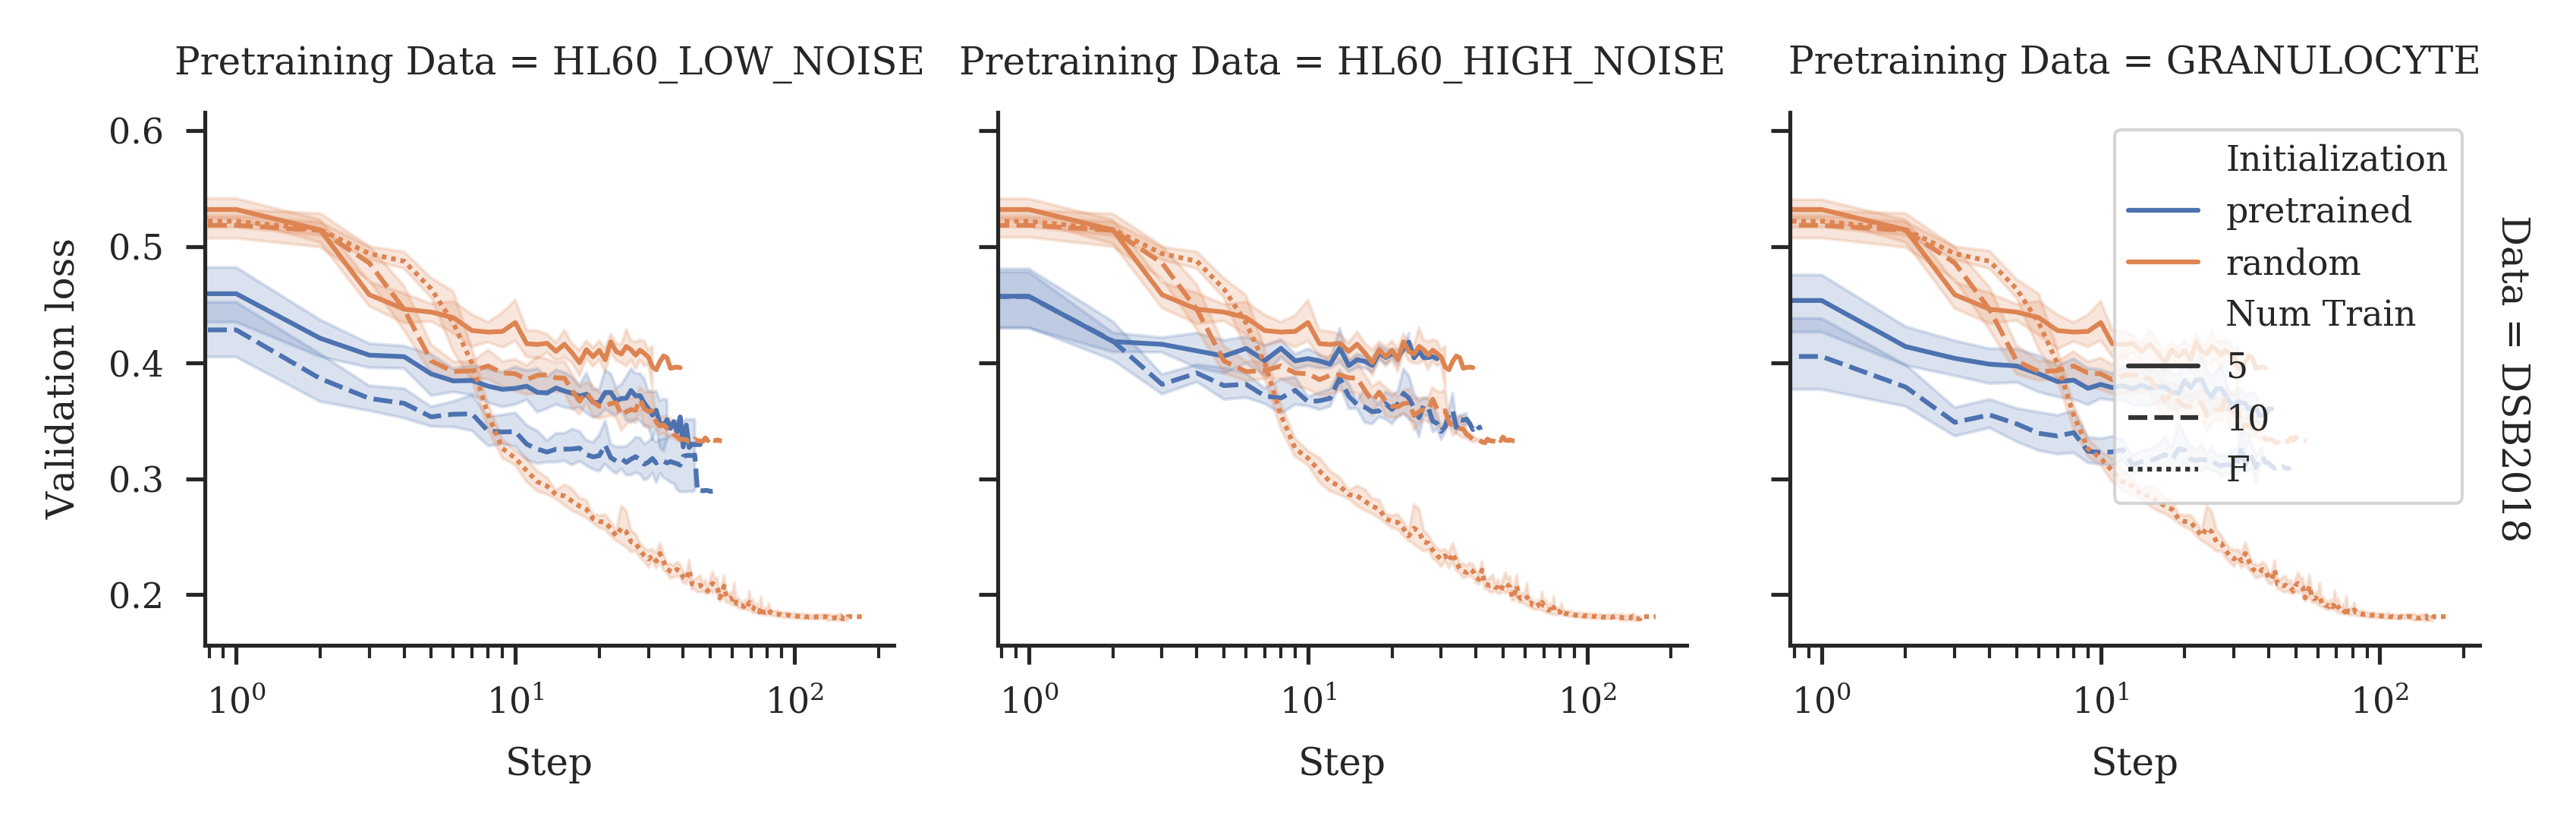

In [43]:
exps = [
    ('hl60low', 'dsb2018', 'stardist', 'unet'),
    ('hl60high', 'dsb2018', 'stardist', 'unet'),
    ('granulocyte', 'dsb2018', 'stardist', 'unet'),
]
selected_models = visualize.get_models(exp_regex(exps))
history_df = visualize._get_model_histories_df(selected_models)

history_df = history_df[history_df['Num Train'].isin([5, 10, 'F'])]
history_df = fill_pretrain_data(history_df)
history_df = convert_to_categorical(history_df)
history_df = rename_datasets(history_df)
history_df = add_joined_data_col(history_df)
history_df['Validation loss'] = history_df['val_loss']


g = sns.FacetGrid(
    data=history_df,
    col='Pretraining Data', row='Data',
    row_order=['DSB2018'],
    col_order=['HL60_LOW_NOISE', 'HL60_HIGH_NOISE', 'GRANULOCYTE'],
    sharey=True, sharex=True, legend_out=False, margin_titles=True,
    **facetgrid_kwargs
)
g.map_dataframe(sns.lineplot, 'Step', 'Validation loss', style='Num Train', hue='Initialization')
plt.subplots_adjust(wspace=0.15)

# g.set_titles(col_template = '{col_name}')
# Set the axis scales and lim
g.set(xscale='log')
# g.set(ylim=(0.15, 1))

#g.add_legend()
plt.legend(loc='upper right')

visualize.save(g, '/tmp/bachelorthesis-plots-tex/exp__history.pdf')

# Experiment "natural"

In [62]:
exps = [
    ('cityscapes', 'hl60low', 'stardist', 'resnet-unet'),
    ('cityscapes', 'dsb2018', 'stardist', 'resnet-unet'),
    ('imagenet', 'dsb2018', 'stardist', 'imagenet-resnet-unet'),
]
selected_models = visualize.get_models(exp_regex(exps))
results_last_df = visualize._get_results_last_df(selected_models, 'ap_dsb2018#mean')

df_1 = results_last_df[results_last_df['Backbone'] == 'resnet-unet'].fillna('cityscapes')
df_2 = results_last_df[results_last_df['Backbone'] == 'imagenet-resnet-unet'].fillna('imagenet')
results_last_df = df_1.append(df_2)

results_last_df = convert_to_categorical(results_last_df)
results_last_df = rename_datasets(results_last_df)
results_last_df = add_joined_data_col(results_last_df)

g = visualize.catplot(
    data=results_last_df,
    col='Joined Data',
    x='Num Train', y='mAP', hue='Initialization',
    col_order=['Pretraining: CITYSCAPES\nData: HL60_LOW_NOISE',
               'Pretraining: CITYSCAPES\nData: DSB2018',
               'Pretraining: IMAGENET\nData: DSB2018'],
    sharey=False, margin_titles=False, legend_out=False,
    **catplot_kwargs
)
g.set_titles(col_template = '{col_name}')
plt.subplots_adjust(wspace=0.3)

g.savefig('/tmp/bachelorthesis-plots-tex/exp_natural_scores.pdf', bbox_inches='tight')

In [44]:
exps = [
    ('cityscapes', 'hl60low', 'stardist', 'resnet-unet'),
    ('cityscapes', 'dsb2018', 'stardist', 'resnet-unet'),
    # TODO include this experiment?
    ('imagenet', 'dsb2018', 'stardist', 'imagenet-resnet-unet'),
]
selected_models = visualize.get_models(exp_regex(exps))
history_df = visualize._get_model_histories_df(selected_models)

history_df = history_df[history_df['Num Train'].isin([5, 'F'])]

# Fill pretrain dataset
df_1 = history_df[history_df['Backbone'] == 'resnet-unet'].fillna('cityscapes')
df_2 = history_df[history_df['Backbone'] == 'imagenet-resnet-unet'].fillna('imagenet')
history_df = df_1.append(df_2)

history_df = convert_to_categorical(history_df)
history_df = rename_datasets(history_df)
history_df = add_joined_data_col(history_df)
history_df['Validation loss'] = history_df['val_loss']


current_facetgrid_kwargs = dict(**facetgrid_kwargs)
#current_facetgrid_kwargs['aspect'] = 0.88
g = sns.FacetGrid(
    data=history_df,
    col='Joined Data',
    col_order=['Pretraining: CITYSCAPES\nData: HL60_LOW_NOISE',
               'Pretraining: CITYSCAPES\nData: DSB2018',
              'Pretraining: IMAGENET\nData: DSB2018'],
    sharey=False, sharex=False, legend_out=True,
    **current_facetgrid_kwargs
)
g.map_dataframe(sns.lineplot, 'Step', 'Validation loss', style='Num Train', hue='Initialization')
plt.subplots_adjust(wspace=0.3)

g.set_titles(col_template = '{col_name}')
# Set the axis scales and lim
g.set(xscale='log')
#g.axes[0,0].set(ylim=(0.2, 1.7))
g.axes[0,1].set(ylim=(0.2, 1.5))
g.axes[0,2].set(ylim=(0.2, 1.5))

# g.add_legend()
plt.legend(loc='upper right')

visualize.save(g, '/tmp/bachelorthesis-plots-tex/exp_natural_history.pdf')

# Experiment "dsb2018"

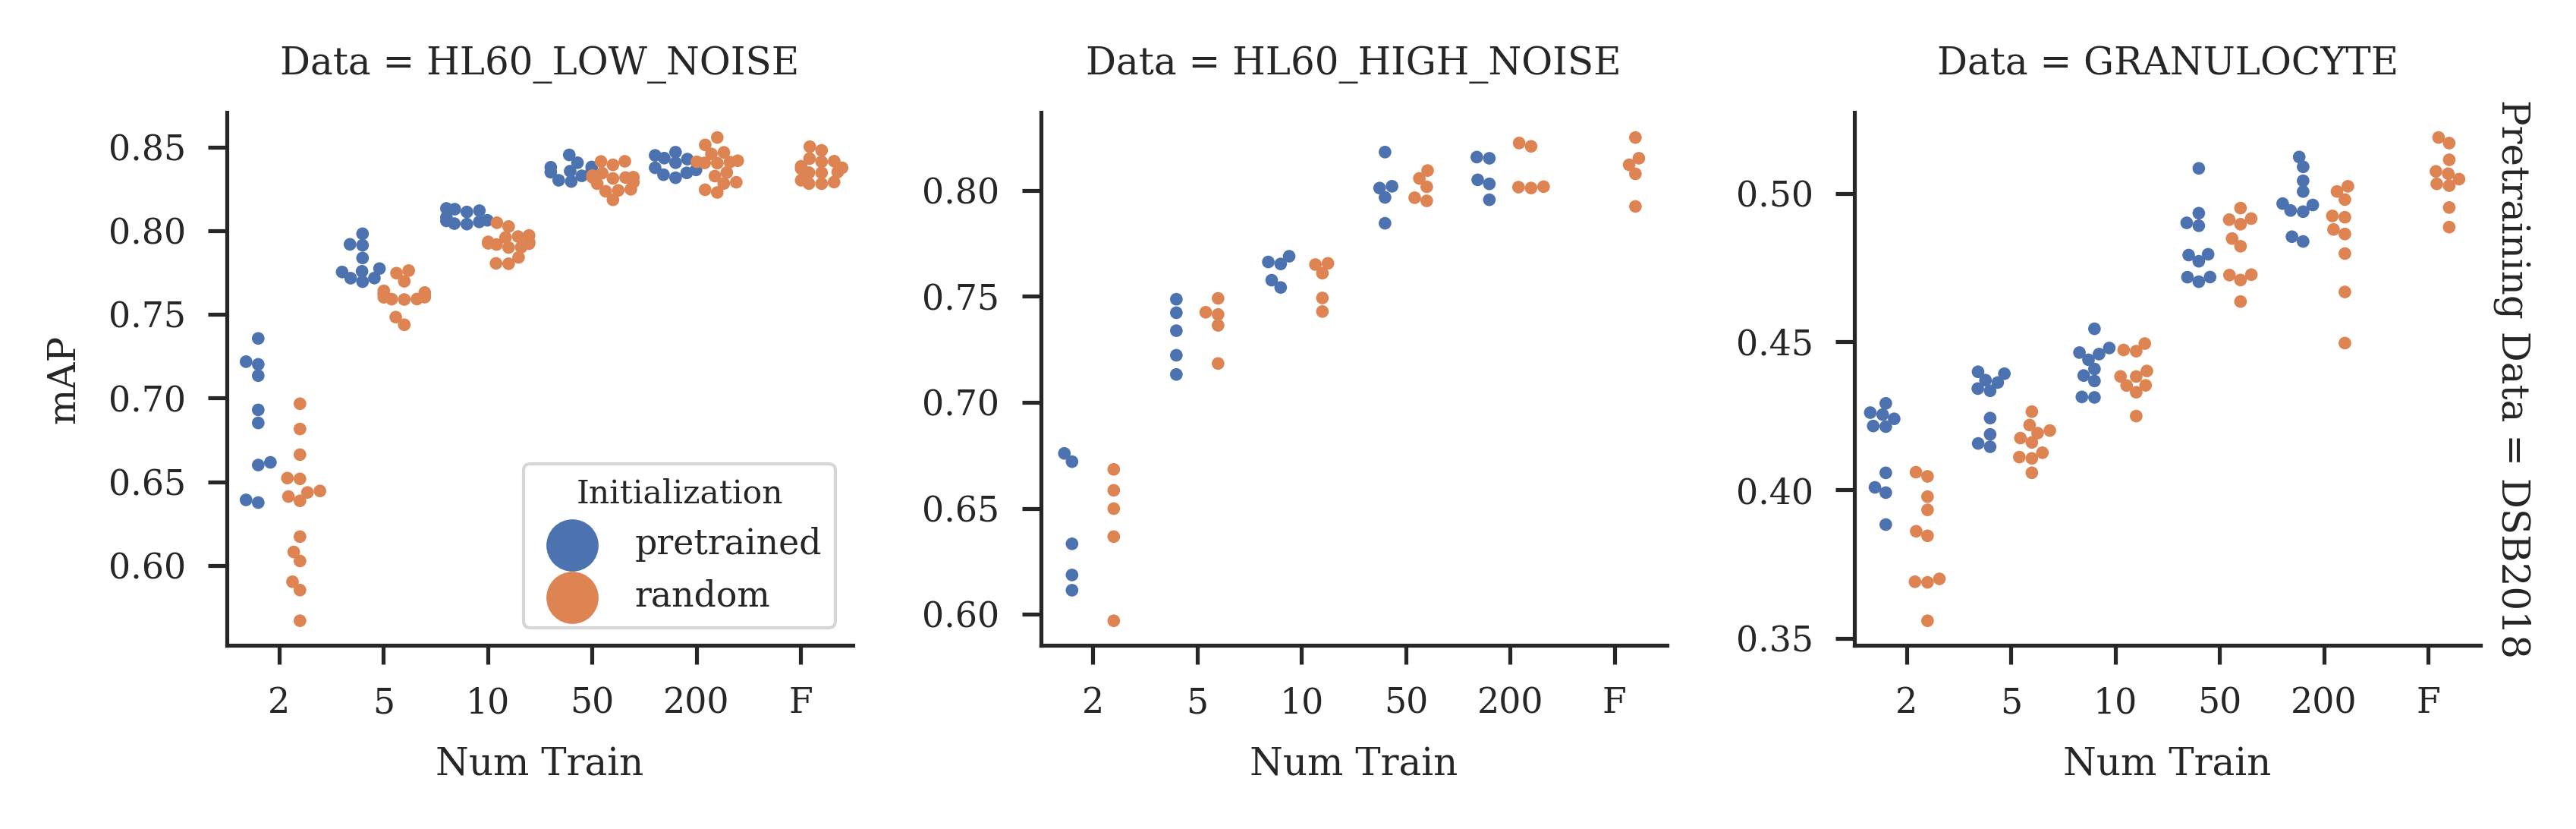

In [45]:
exps = [
    ('dsb2018', 'hl60low', 'stardist', 'unet'),
    ('dsb2018', 'hl60high', 'stardist', 'unet'),
    ('dsb2018', 'granulocyte', 'stardist', 'unet'),
]
selected_models = visualize.get_models(exp_regex(exps))
results_last_df = visualize._get_results_last_df(selected_models, 'ap_dsb2018#mean')

results_last_df = fill_pretrain_data(results_last_df)
results_last_df = convert_to_categorical(results_last_df)
results_last_df = rename_datasets(results_last_df)

g = visualize.catplot(
    data=results_last_df,
    col='Data', row='Pretraining Data',
    x='Num Train', y='mAP', hue='Initialization',
    row_order=['DSB2018'],
    col_order=['HL60_LOW_NOISE', 'HL60_HIGH_NOISE', 'GRANULOCYTE'],
    sharey=False, margin_titles=True, legend_out=False,
    **catplot_kwargs
)
plt.subplots_adjust(wspace=0.3)

g.savefig('/tmp/bachelorthesis-plots-tex/exp_dsb2018_scores.pdf', bbox_inches='tight')

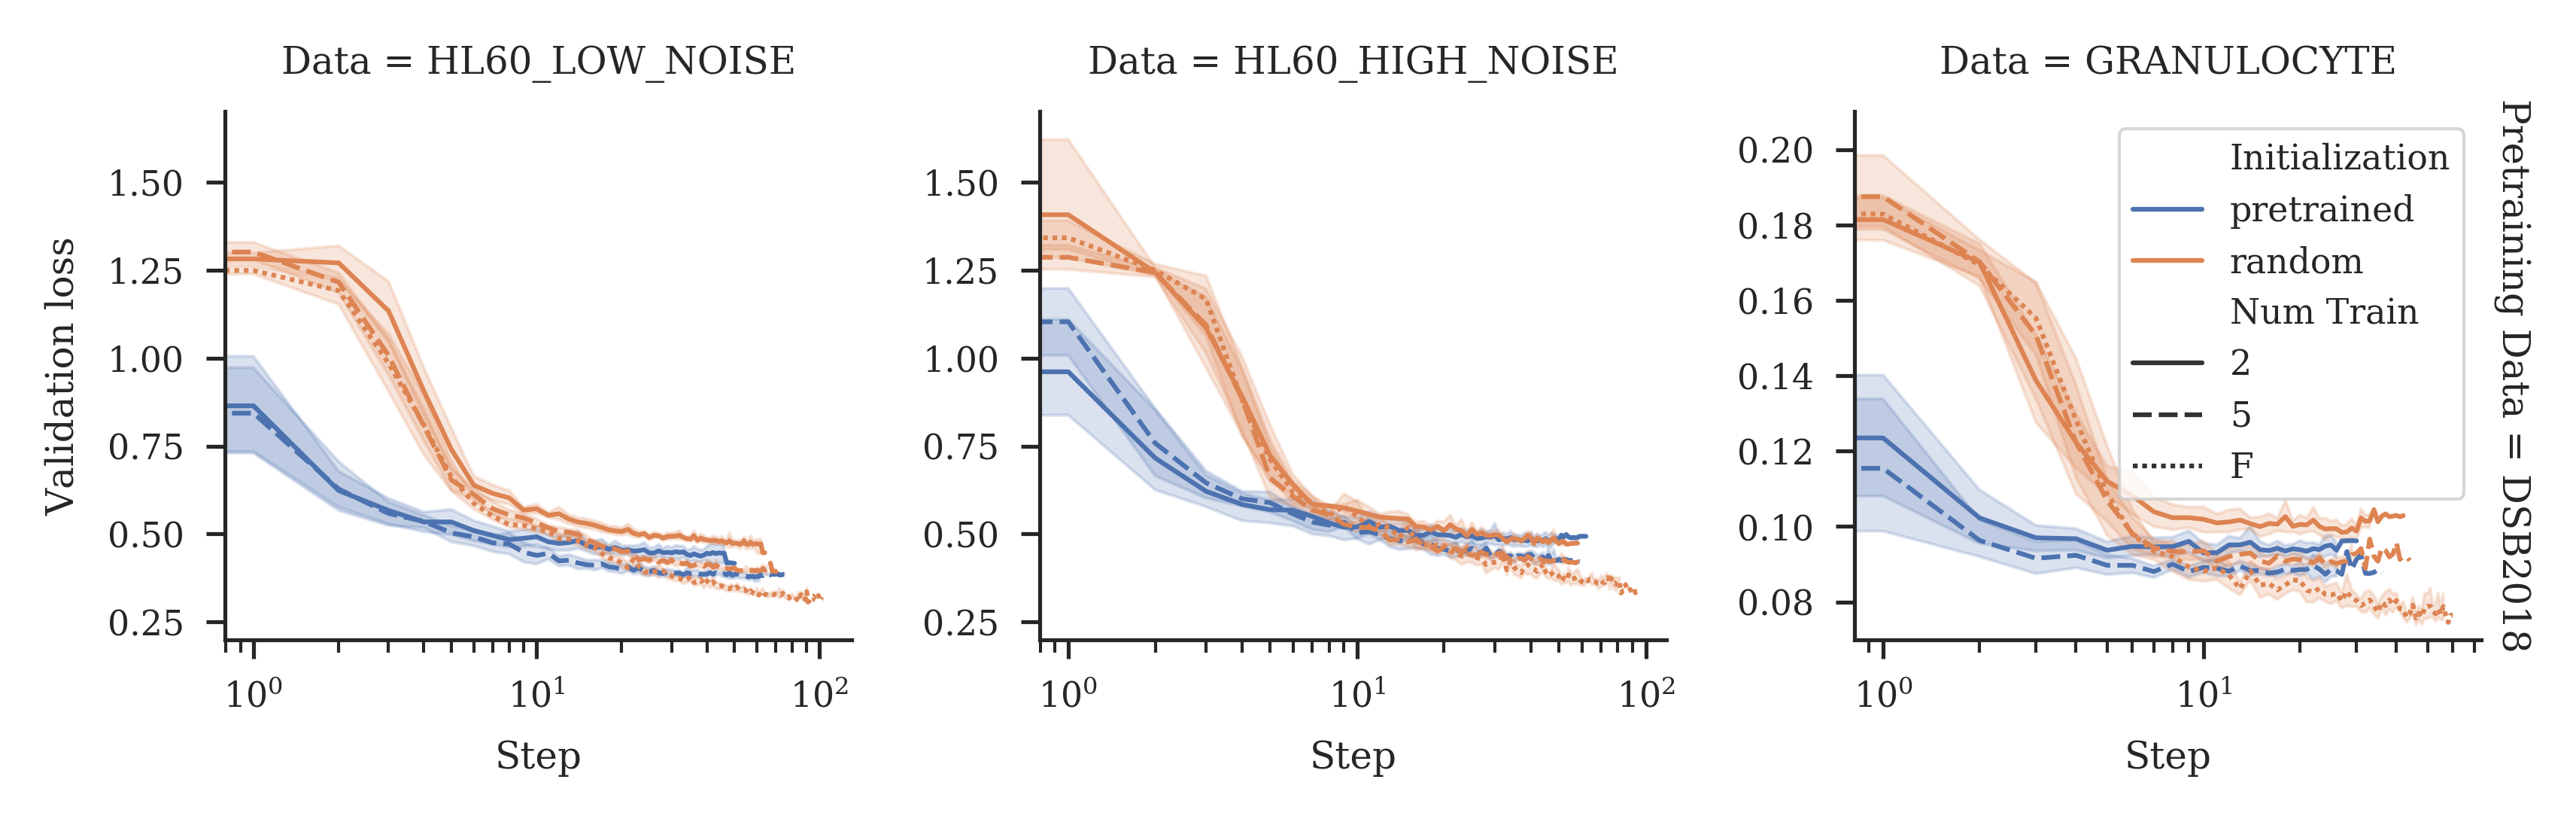

In [47]:
exps = [
    ('dsb2018', 'hl60low', 'stardist', 'unet'),
    ('dsb2018', 'hl60high', 'stardist', 'unet'),
    ('dsb2018', 'granulocyte', 'stardist', 'unet'),
]
selected_models = visualize.get_models(exp_regex(exps))
history_df = visualize._get_model_histories_df(selected_models)

history_df = history_df[history_df['Num Train'].isin([2, 5, 'F'])]
history_df = fill_pretrain_data(history_df)
history_df = convert_to_categorical(history_df)
history_df = rename_datasets(history_df)
history_df = add_joined_data_col(history_df)
history_df['Validation loss'] = history_df['val_loss']

current_facetgrid_kwargs = dict(**facetgrid_kwargs)
#current_facetgrid_kwargs['aspect'] = 0.88
g = sns.FacetGrid(
    data=history_df,
    col='Data', row='Pretraining Data',
    col_order=['HL60_LOW_NOISE', 'HL60_HIGH_NOISE', 'GRANULOCYTE'],
    sharey=False, sharex=False, legend_out=True,
    margin_titles=True,
    **current_facetgrid_kwargs
)
g.map_dataframe(sns.lineplot, 'Step', 'Validation loss', style='Num Train', hue='Initialization')
plt.subplots_adjust(wspace=0.3)

# Set the axis scales and lim
g.set(xscale='log')
g.axes[0,0].set(ylim=(0.2, 1.7))
g.axes[0,1].set(ylim=(0.2, 1.7))
g.axes[0,2].set(ylim=(0.07, 0.21))

#g.add_legend()
plt.legend(loc='upper right')


visualize.save(g, '/tmp/bachelorthesis-plots-tex/exp_dsb2018_history.pdf')

# Experiment "multi"

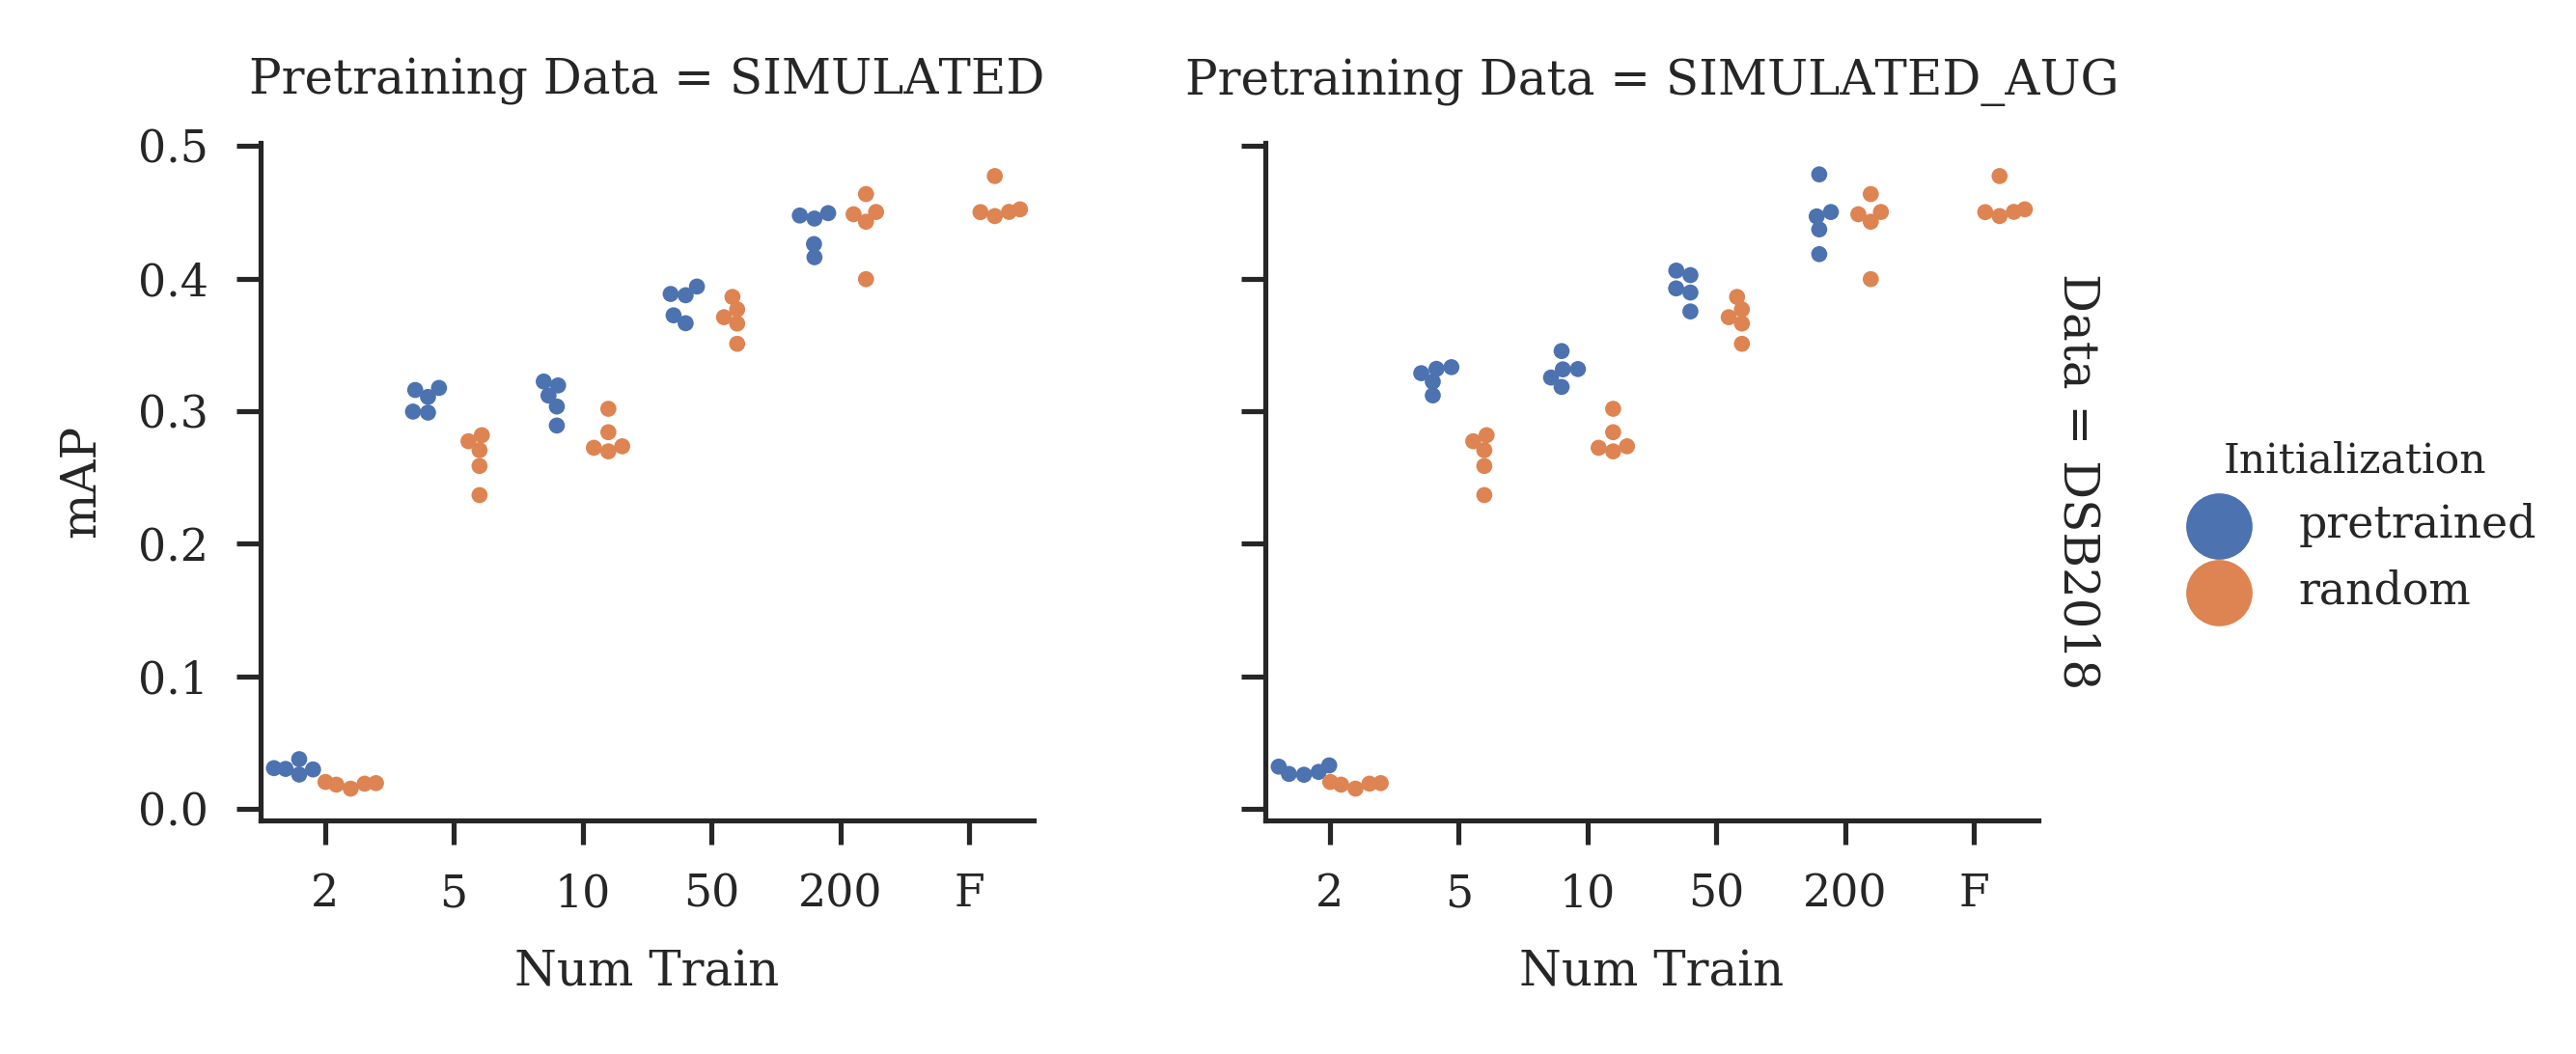

In [59]:
exps = [
    ('hl60low-granulocyte-aug', 'dsb2018', 'stardist', 'resnet-unet'),
    ('hl60low-hl60high-granulocyte', 'dsb2018', 'stardist', 'resnet-unet')
]
selected_models = visualize.get_models(exp_regex(exps))
results_last_df = visualize._get_results_last_df(selected_models, 'ap_dsb2018#mean')



results_last_df = fill_pretrain_data(results_last_df)
results_last_df = convert_to_categorical(results_last_df)
results_last_df = rename_datasets(results_last_df)
results_last_df = add_joined_data_col(results_last_df)

g = visualize.catplot(
    data=results_last_df,
    col='Pretraining Data',
    row='Data',
    x='Num Train', y='mAP', hue='Initialization',
    col_order=['SIMULATED', 'SIMULATED_AUG'],
    sharey=True, margin_titles=True, legend_out=True,
    **catplot_kwargs
)
plt.subplots_adjust(wspace=0.3)
# g.set_titles(col_template = '{col_name}')

g.savefig('/tmp/bachelorthesis-plots-tex/exp_multi_scores.pdf', bbox_inches='tight')

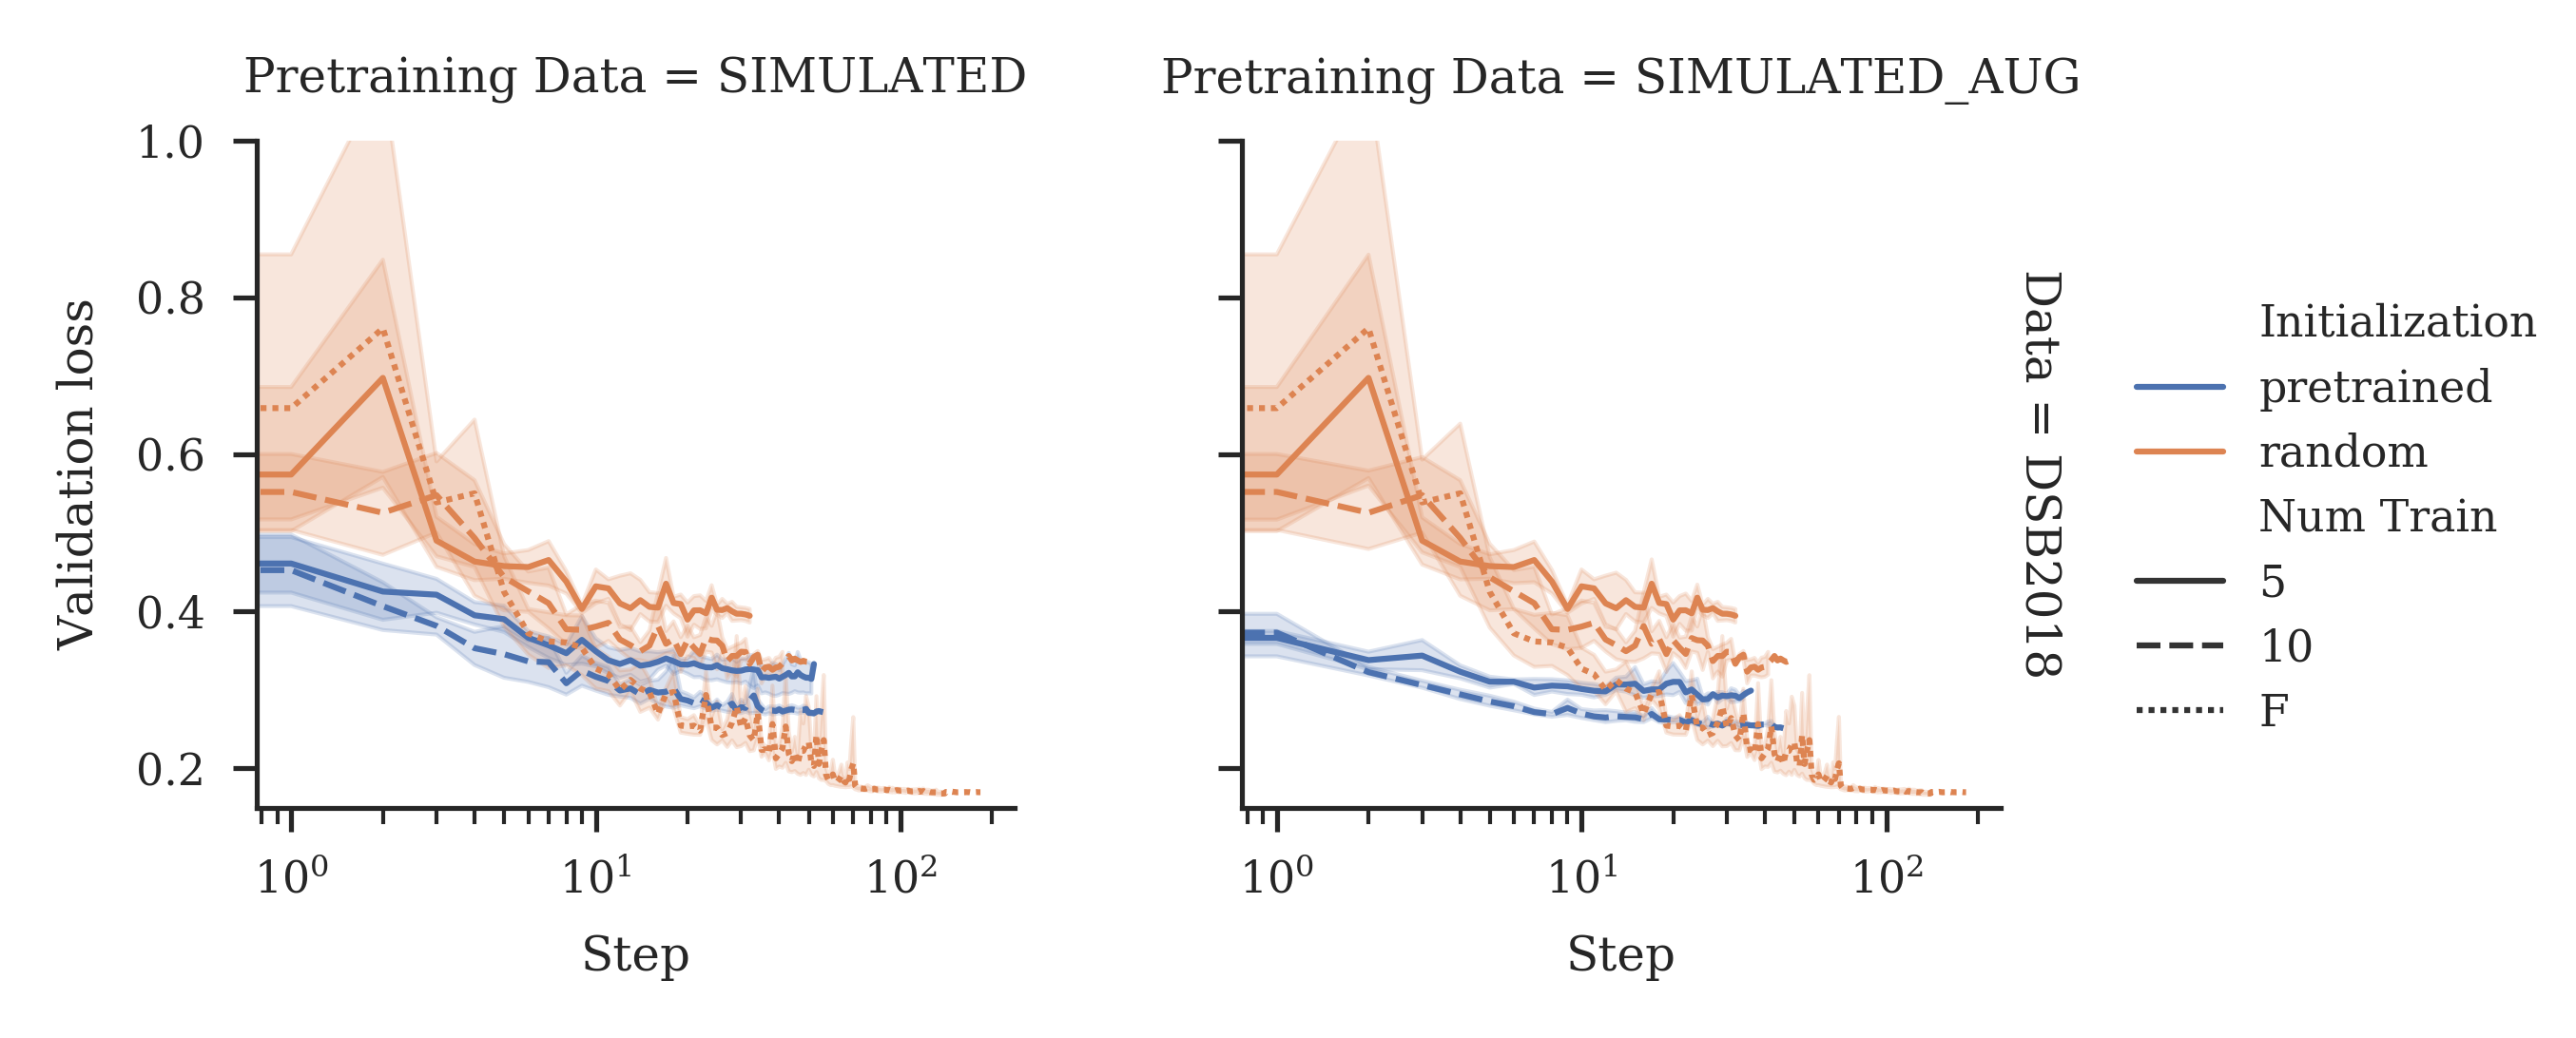

In [61]:
exps = [
    ('hl60low-granulocyte-aug', 'dsb2018', 'stardist', 'resnet-unet'),
    ('hl60low-hl60high-granulocyte', 'dsb2018', 'stardist', 'resnet-unet')
]
selected_models = visualize.get_models(exp_regex(exps))
history_df = visualize._get_model_histories_df(selected_models)

history_df = history_df[history_df['Num Train'].isin([5, 10, 'F'])]
history_df = fill_pretrain_data(history_df)
history_df = convert_to_categorical(history_df)
history_df = rename_datasets(history_df)
history_df = add_joined_data_col(history_df)
history_df['Validation loss'] = history_df['val_loss']


current_facetgrid_kwargs = dict(**facetgrid_kwargs)
g = sns.FacetGrid(
    data=history_df,
    col='Pretraining Data',
    row='Data',
    col_order=['SIMULATED', 'SIMULATED_AUG'],
    sharey=True, sharex=False, legend_out=True, margin_titles=True,
    **current_facetgrid_kwargs
)
g.map_dataframe(sns.lineplot, 'Step', 'Validation loss', style='Num Train', hue='Initialization')
plt.subplots_adjust(wspace=0.3)

# g.set_titles(col_template = '{col_name}')
# Set the axis scales and lim
g.set(xscale='log')
g.axes[0,0].set(ylim=(0.15, 1))
g.axes[0,1].set(ylim=(0.15, 1))

g.add_legend()

visualize.save(g, '/tmp/bachelorthesis-plots-tex/exp_multi_history.pdf')

# ==========================================================
# ==========================================================
#     APPENDIX RESULTS
# ==========================================================
# ==========================================================

# Swarmplots for the scores

## Pretrain on simulated datasets

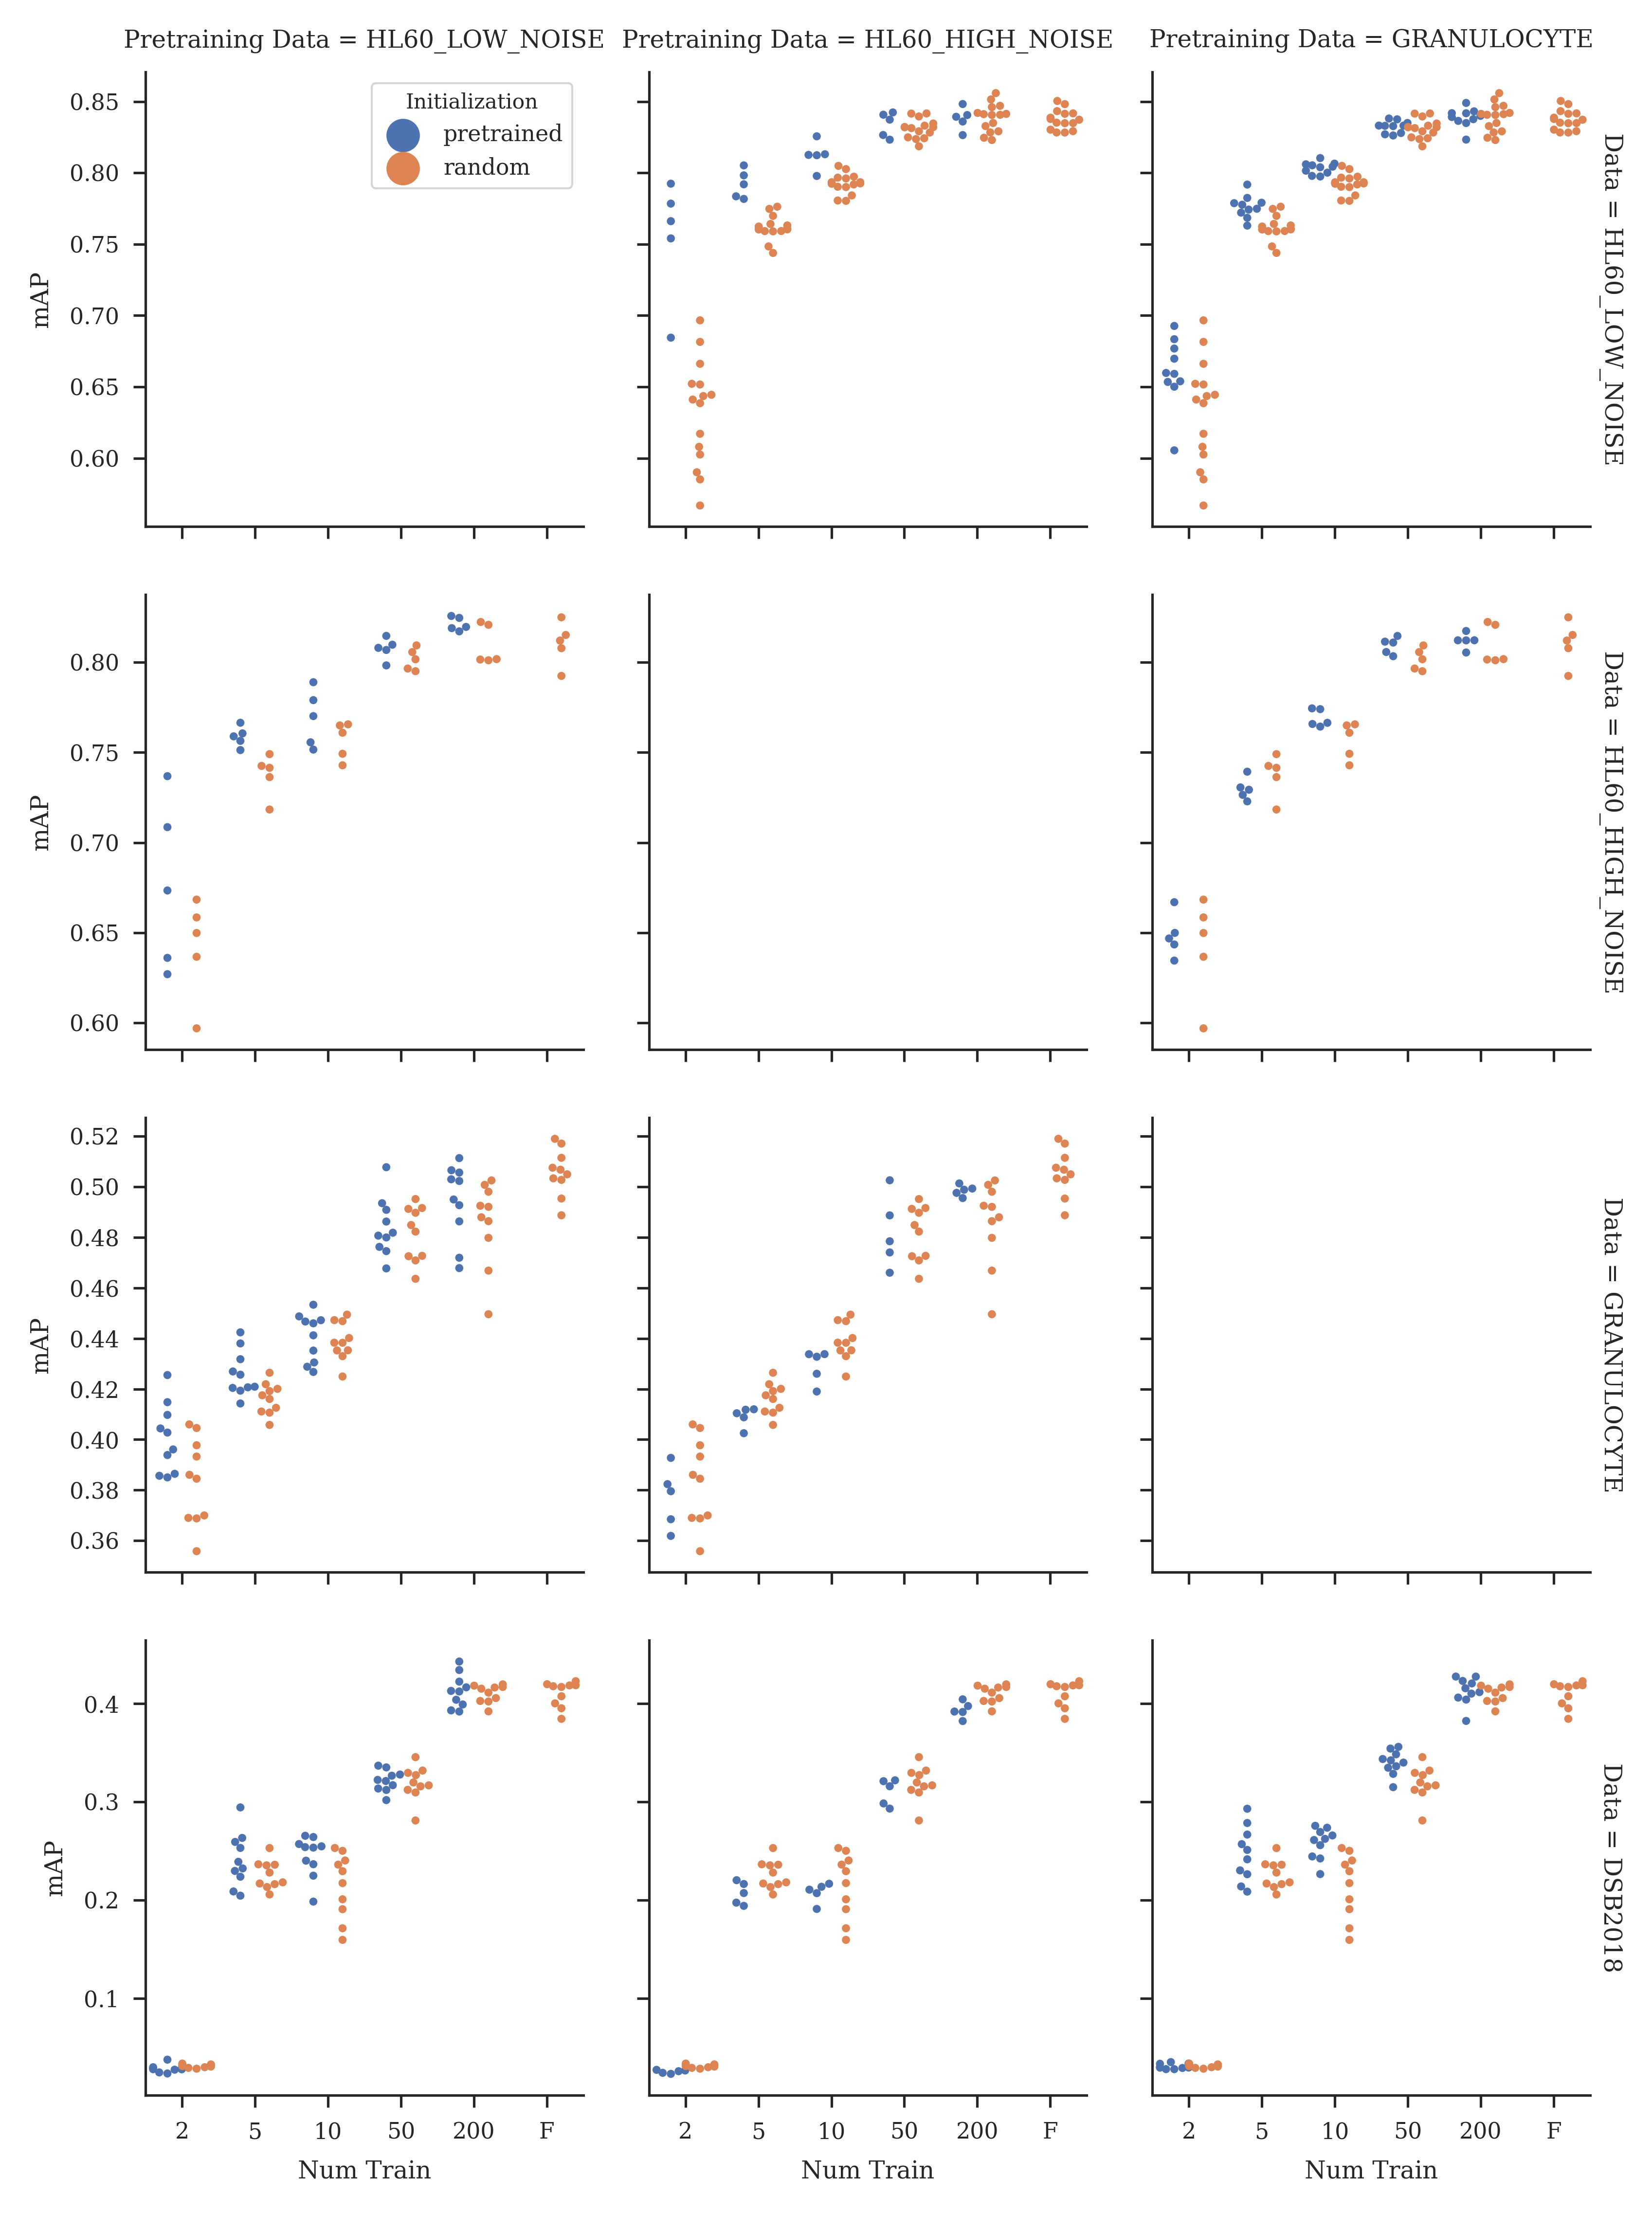

In [10]:
exps = [
    # HL60 Low Noise
    ('hl60low', 'hl60high', 'stardist', 'unet'),
    ('hl60low', 'granulocyte', 'stardist', 'unet'),
    ('hl60low', 'dsb2018', 'stardist', 'unet'),
    
    # HL60 High Noise
    ('hl60high', 'hl60low', 'stardist', 'unet'),
    ('hl60high', 'granulocyte', 'stardist', 'unet'),
    ('hl60high', 'dsb2018', 'stardist', 'unet'),
    
    # Granulocyte
    ('granulocyte', 'hl60low', 'stardist', 'unet'),
    ('granulocyte', 'hl60high', 'stardist', 'unet'),
    ('granulocyte', 'dsb2018', 'stardist', 'unet'),
]

selected_models = visualize.get_models(exp_regex(exps))
results_last_df = visualize._get_results_last_df(selected_models, 'ap_dsb2018#mean')

results_last_df = fill_pretrain_data(results_last_df)
results_last_df = convert_to_categorical(results_last_df)
results_last_df = rename_datasets(results_last_df)

# Plot
g = visualize.catplot(
    data=results_last_df,
    col='Pretraining Data', row='Data',
    x='Num Train', y='mAP', hue='Initialization',
    row_order=['HL60_LOW_NOISE', 'HL60_HIGH_NOISE', 'GRANULOCYTE', 'DSB2018'],
    col_order=['HL60_LOW_NOISE', 'HL60_HIGH_NOISE', 'GRANULOCYTE'],
    sharey='row', margin_titles=True, legend_out=False,
    **catplot_kwargs
)
plt.subplots_adjust(hspace=0.15, wspace=0.15)

visualize.save(g, '/tmp/bachelorthesis-plots-tex/pretrain_sim_map.pdf')

## Pretrain on DSB2018

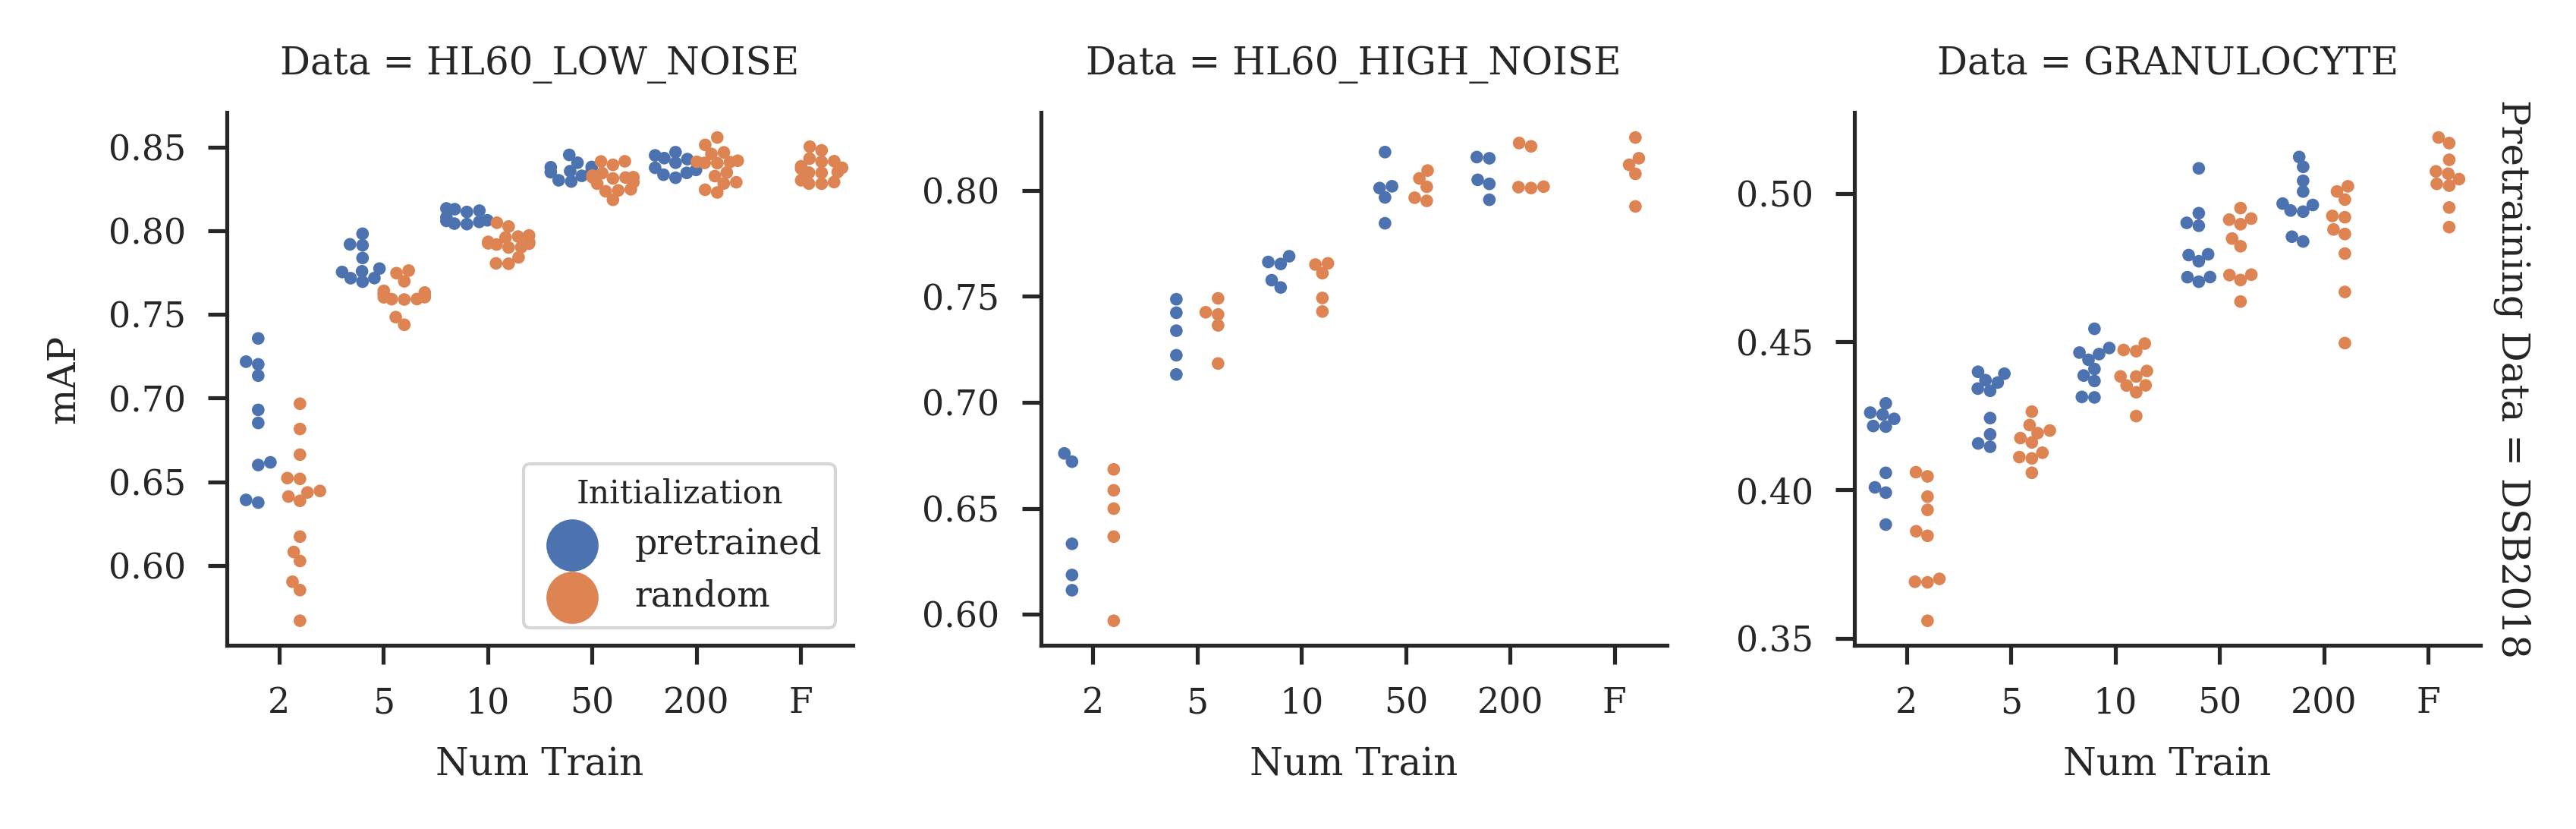

In [11]:
exps = [
    ('dsb2018', 'hl60low', 'stardist', 'unet'),
    ('dsb2018', 'hl60high', 'stardist', 'unet'),
    ('dsb2018', 'granulocyte', 'stardist', 'unet'),
]
selected_models = visualize.get_models(exp_regex(exps))
results_last_df = visualize._get_results_last_df(selected_models, 'ap_dsb2018#mean')

results_last_df = fill_pretrain_data(results_last_df)
results_last_df = convert_to_categorical(results_last_df)
results_last_df = rename_datasets(results_last_df)

g = visualize.catplot(
    data=results_last_df,
    col='Data', row='Pretraining Data',
    x='Num Train', y='mAP', hue='Initialization',
    row_order=['DSB2018'],
    col_order=['HL60_LOW_NOISE', 'HL60_HIGH_NOISE', 'GRANULOCYTE'],
    sharey=False, margin_titles=True, legend_out=False,
    **catplot_kwargs
)
plt.subplots_adjust(wspace=0.3)

g.savefig('/tmp/bachelorthesis-plots-tex/pretrain_dsb2018_map.pdf', bbox_inches='tight')

## Pretrain on real-world images

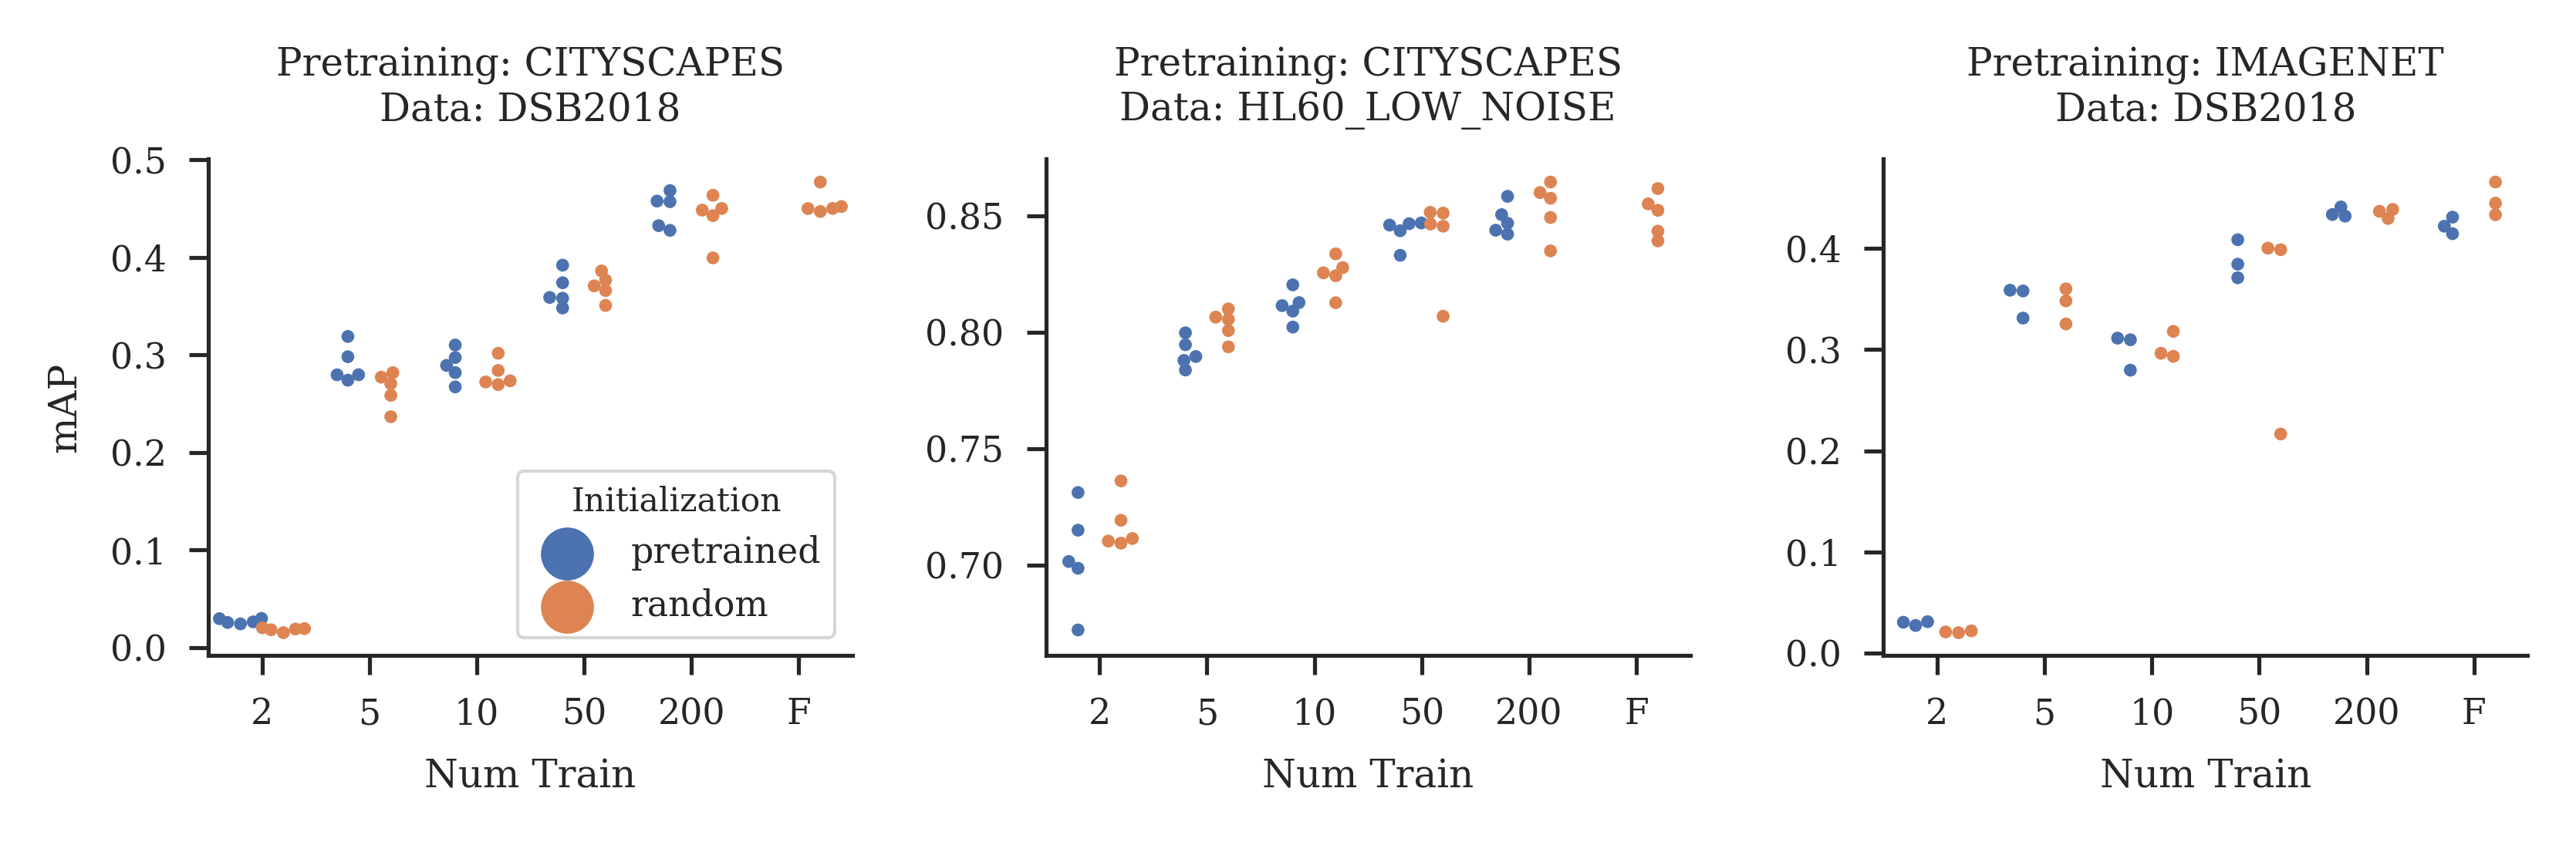

In [12]:
exps = [
    ('cityscapes', 'hl60low', 'stardist', 'resnet-unet'),
    ('cityscapes', 'dsb2018', 'stardist', 'resnet-unet'),
    ('imagenet', 'dsb2018', 'stardist', 'imagenet-resnet-unet'),
]
selected_models = visualize.get_models(exp_regex(exps))
results_last_df = visualize._get_results_last_df(selected_models, 'ap_dsb2018#mean')

df_1 = results_last_df[results_last_df['Backbone'] == 'resnet-unet'].fillna('cityscapes')
df_2 = results_last_df[results_last_df['Backbone'] == 'imagenet-resnet-unet'].fillna('imagenet')
results_last_df = df_1.append(df_2)

results_last_df = convert_to_categorical(results_last_df)
results_last_df = rename_datasets(results_last_df)
results_last_df = add_joined_data_col(results_last_df)

g = visualize.catplot(
    data=results_last_df,
    col='Joined Data',
    x='Num Train', y='mAP', hue='Initialization',
    col_order=['Pretraining: CITYSCAPES\nData: DSB2018',
               'Pretraining: CITYSCAPES\nData: HL60_LOW_NOISE',
               'Pretraining: IMAGENET\nData: DSB2018'],
    sharey=False, margin_titles=False, legend_out=False,
    **catplot_kwargs
)
g.set_titles(col_template = '{col_name}')
plt.subplots_adjust(wspace=0.3)

g.savefig('/tmp/bachelorthesis-plots-tex/pretrain_real_map.pdf', bbox_inches='tight')

## Pretrain on multiple datasets

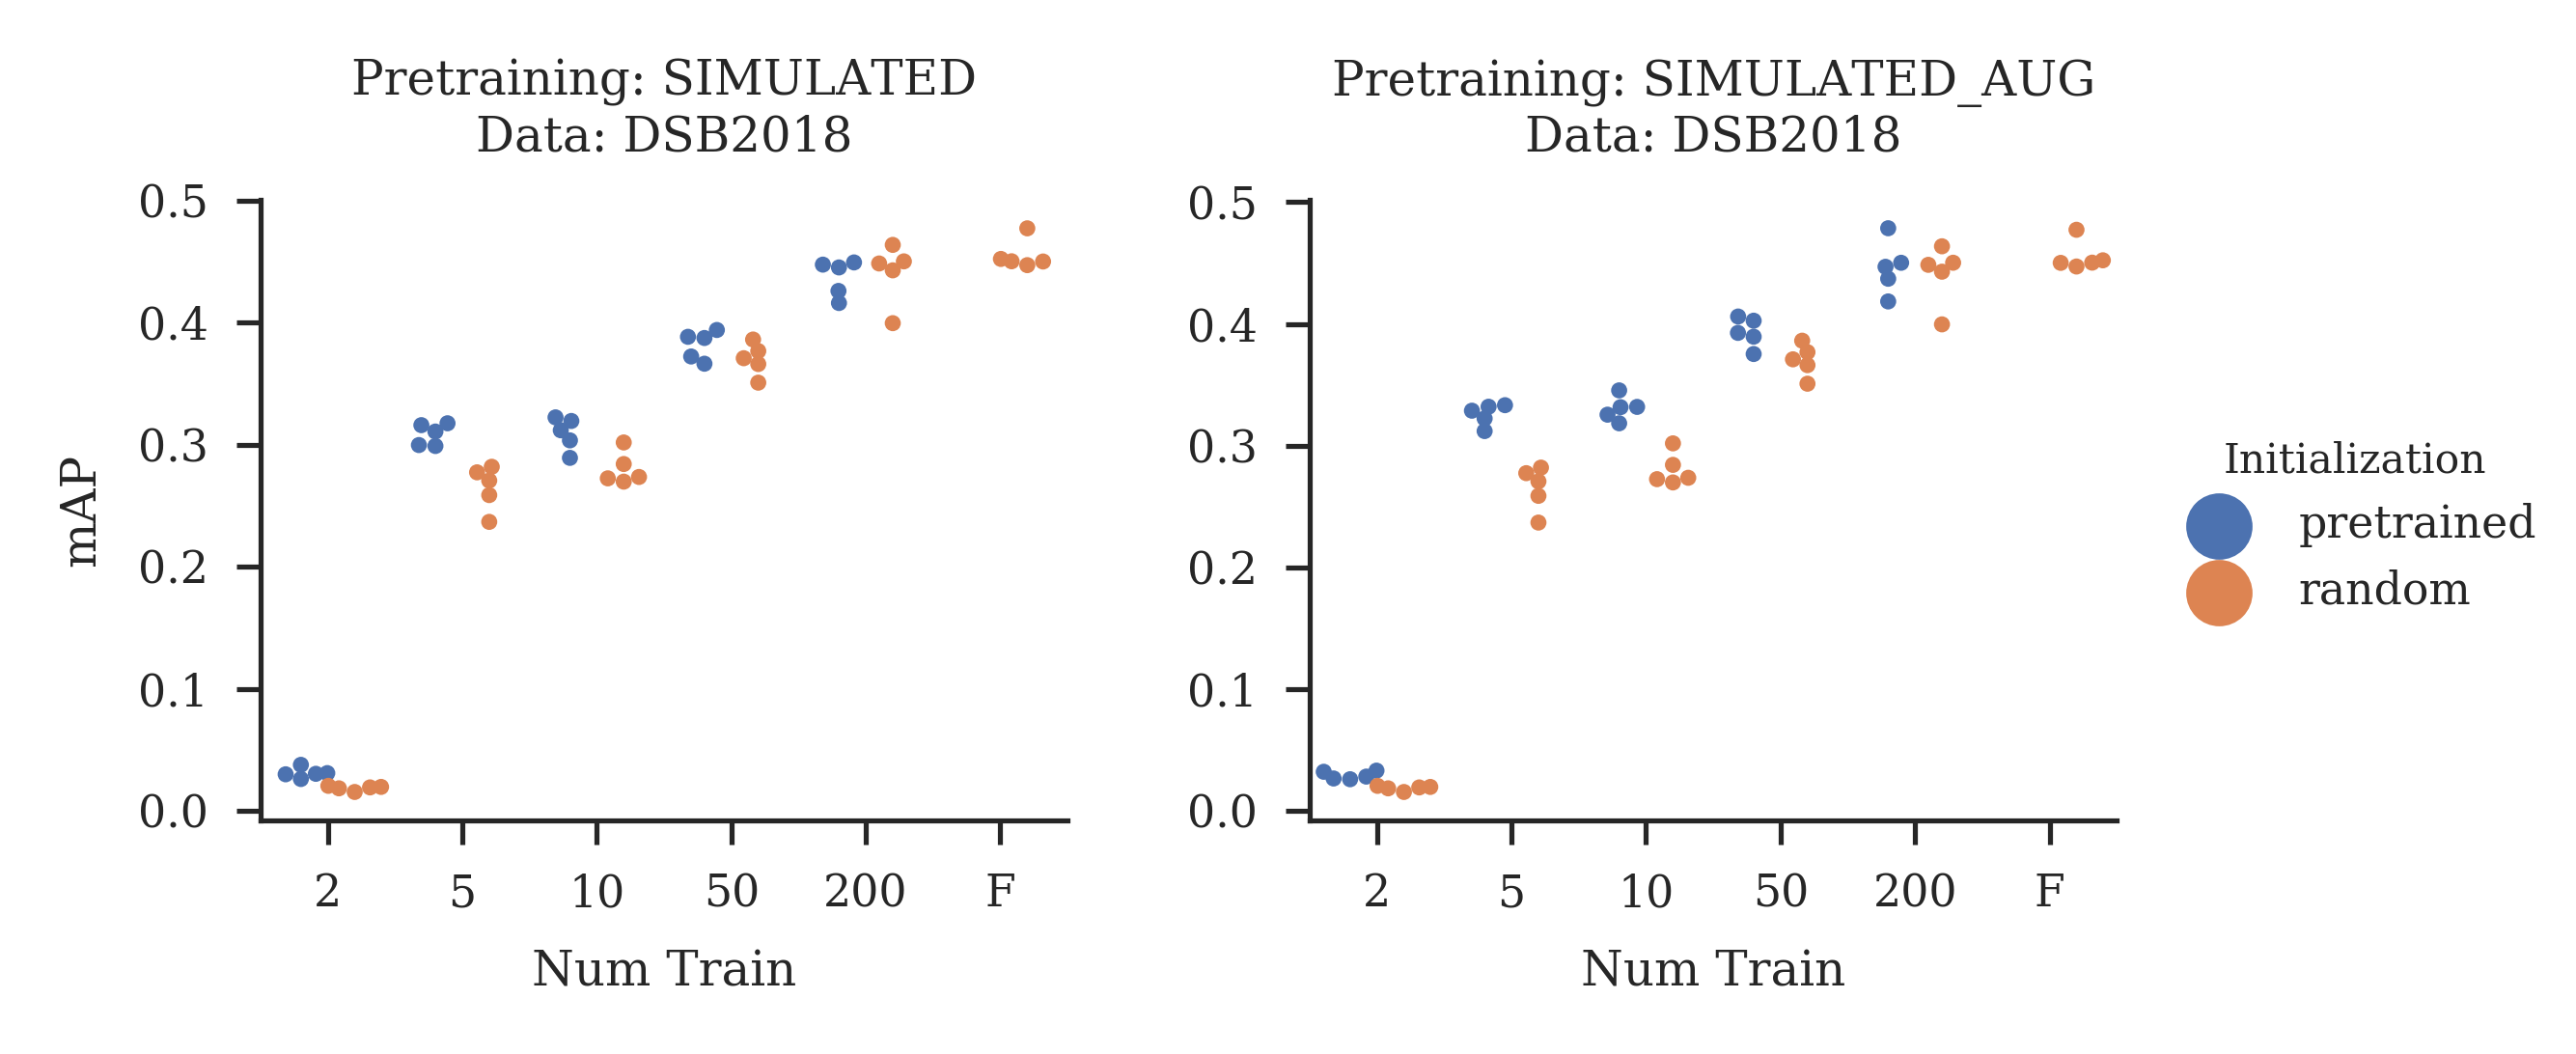

In [13]:
exps = [
    ('hl60low-granulocyte-aug', 'dsb2018', 'stardist', 'resnet-unet'),
    ('hl60low-hl60high-granulocyte', 'dsb2018', 'stardist', 'resnet-unet')
]
selected_models = visualize.get_models(exp_regex(exps))
results_last_df = visualize._get_results_last_df(selected_models, 'ap_dsb2018#mean')



results_last_df = fill_pretrain_data(results_last_df)
results_last_df = convert_to_categorical(results_last_df)
results_last_df = rename_datasets(results_last_df)
results_last_df = add_joined_data_col(results_last_df)

g = visualize.catplot(
    data=results_last_df,
    col='Joined Data',
    x='Num Train', y='mAP', hue='Initialization',
    col_order=['Pretraining: SIMULATED\nData: DSB2018',
               'Pretraining: SIMULATED_AUG\nData: DSB2018'],
    sharey=False, margin_titles=False, legend_out=True,
    **catplot_kwargs
)
plt.subplots_adjust(wspace=0.3)
g.set_titles(col_template = '{col_name}')

g.savefig('/tmp/bachelorthesis-plots-tex/pretrain_mult_map.pdf', bbox_inches='tight')

# Line plots

## Pretrain on simulated datasets

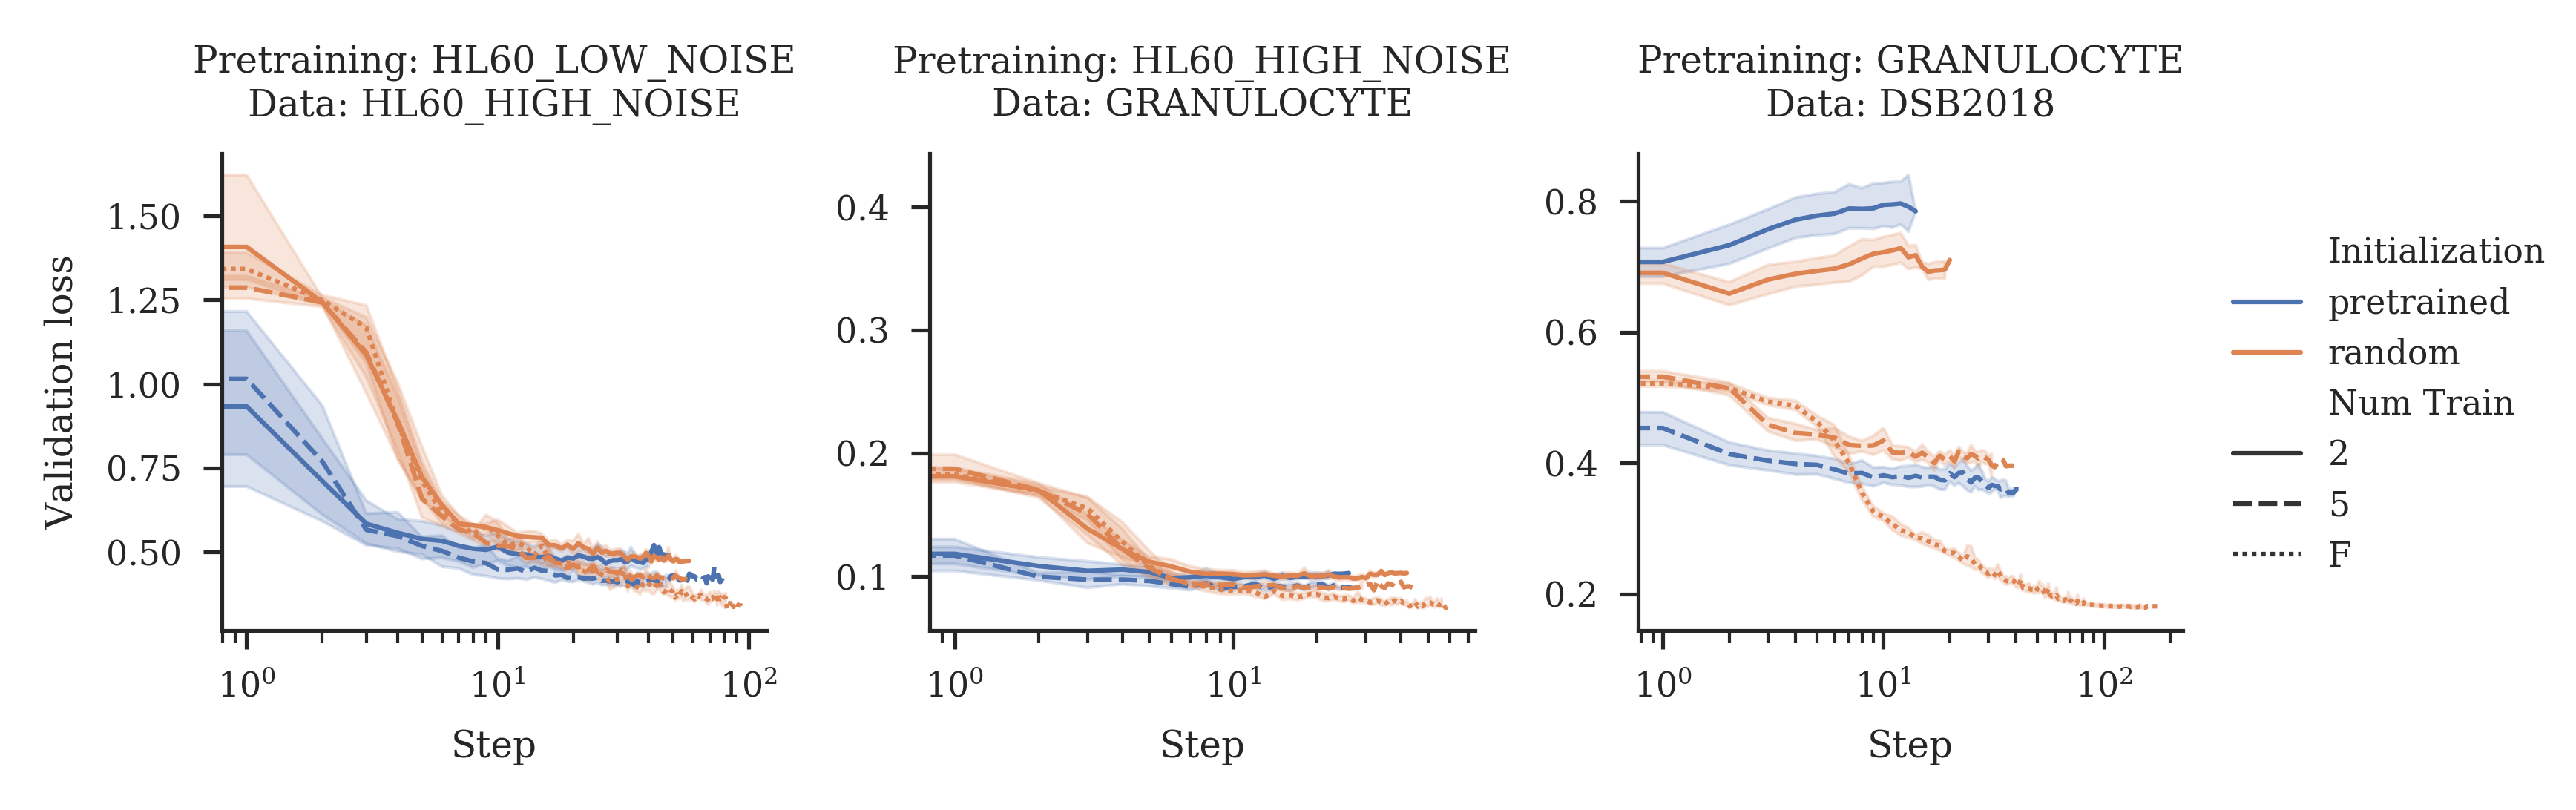

In [14]:
exps = [
    ('hl60low', 'hl60high', 'stardist', 'unet'),
    ('hl60high', 'granulocyte', 'stardist', 'unet'),
    ('granulocyte', 'dsb2018', 'stardist', 'unet'),
]
selected_models = visualize.get_models(exp_regex(exps))
history_df = visualize._get_model_histories_df(selected_models)

# TODO other num train for the dsb dataset?
history_df = history_df[history_df['Num Train'].isin([2, 5, 'F'])]

history_df = fill_pretrain_data(history_df)
history_df = convert_to_categorical(history_df)
history_df = rename_datasets(history_df)
history_df = add_joined_data_col(history_df)
history_df['Validation loss'] = history_df['val_loss']


current_facetgrid_kwargs = dict(**facetgrid_kwargs)
current_facetgrid_kwargs['aspect'] = 0.88
g = sns.FacetGrid(
    data=history_df,
    col='Joined Data',
    col_order=['Pretraining: HL60_LOW_NOISE\nData: HL60_HIGH_NOISE',
               'Pretraining: HL60_HIGH_NOISE\nData: GRANULOCYTE',
               'Pretraining: GRANULOCYTE\nData: DSB2018',],
    sharey=False, sharex=False, legend_out=True,
    **current_facetgrid_kwargs
)
g.map_dataframe(sns.lineplot, 'Step', 'Validation loss', style='Num Train', hue='Initialization')
plt.subplots_adjust(wspace=0.3)

g.set_titles(col_template = '{col_name}')
# g.axes[0,0].set(ylim=(0.3, 0.6), yscale='log', xscale='log')
# g.axes[0,2].set(ylim=(0.06, 0.13), yscale='log', xscale='log')
# g.axes[0,0].set(yscale='log', xscale='log')
# g.axes[0,1].set(yscale='log', xscale='log')
# g.axes[0,2].set(yscale='log', xscale='log')
g.set(xscale='log')

g.add_legend()

visualize.save(g, '/tmp/bachelorthesis-plots-tex/history_sim.pdf')

# Pretrain on DSB2018

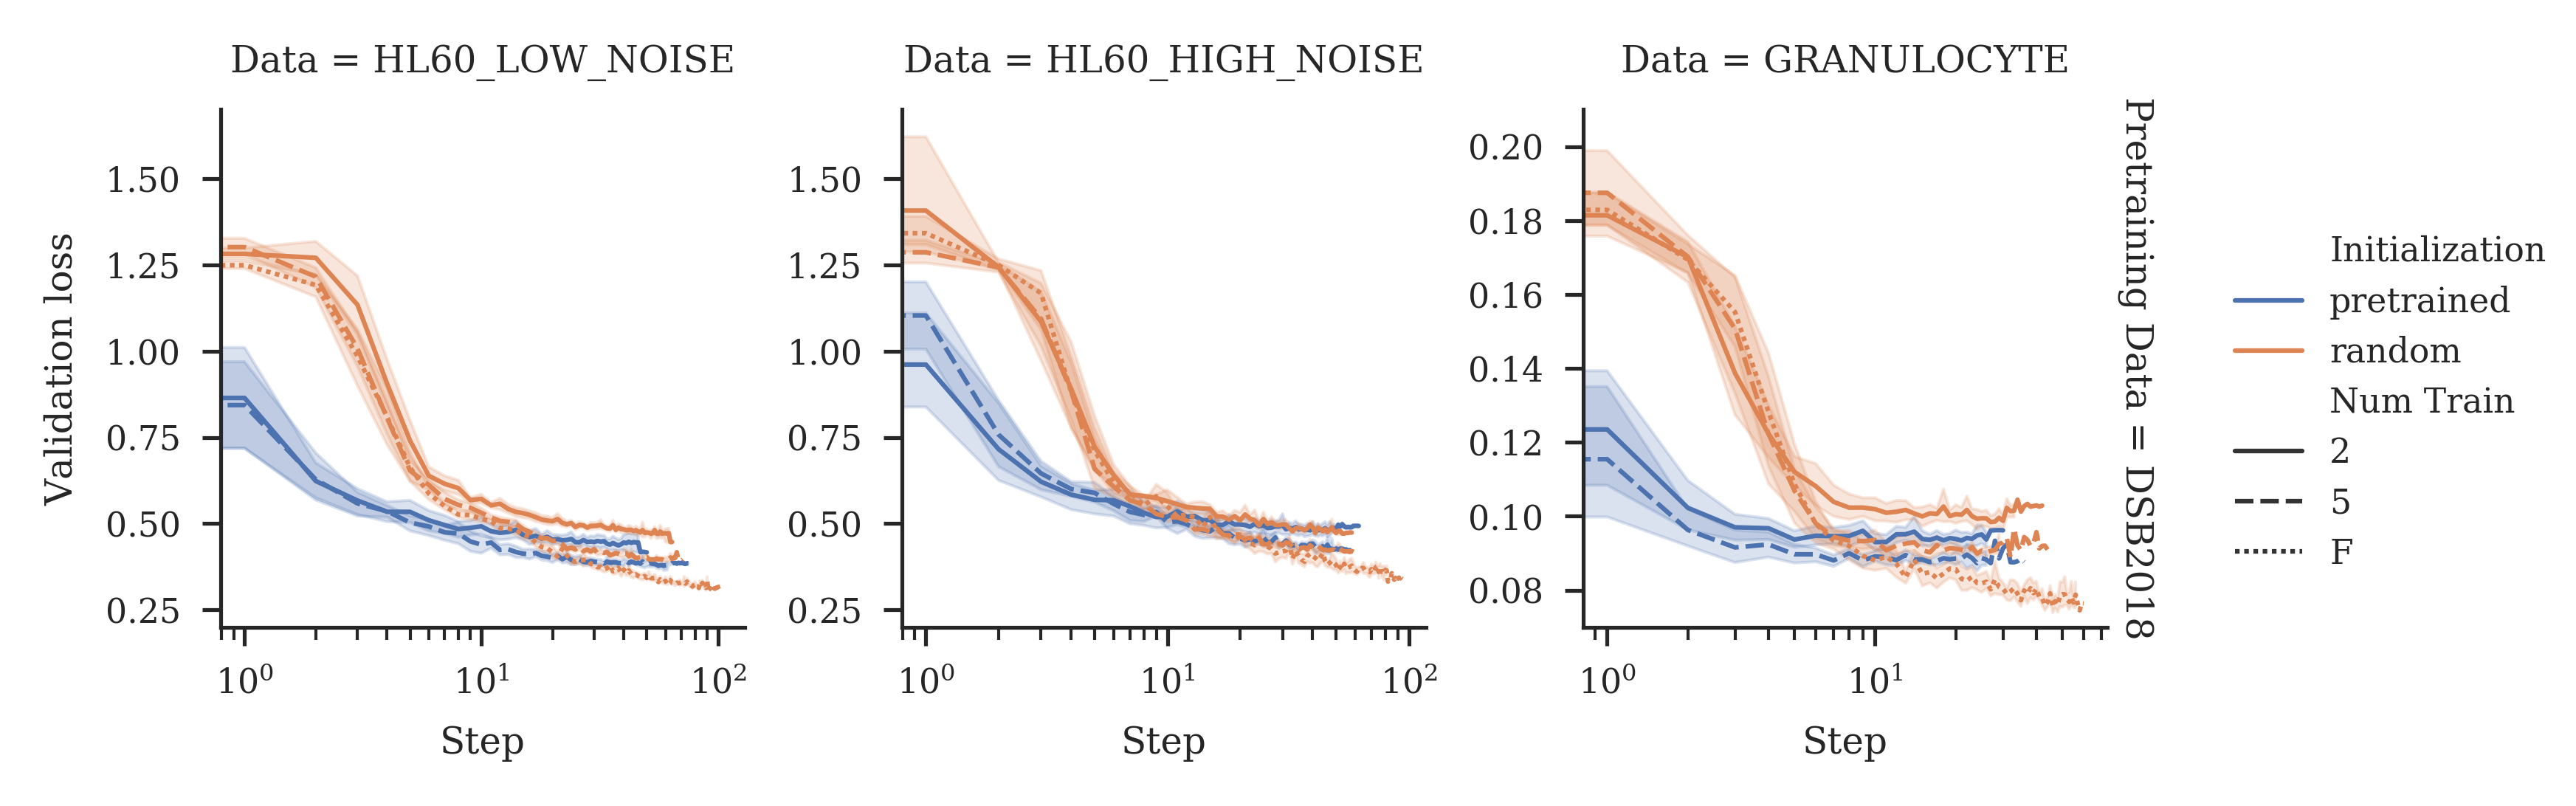

In [36]:
exps = [
    ('dsb2018', 'hl60low', 'stardist', 'unet'),
    ('dsb2018', 'hl60high', 'stardist', 'unet'),
    ('dsb2018', 'granulocyte', 'stardist', 'unet'),
]
selected_models = visualize.get_models(exp_regex(exps))
history_df = visualize._get_model_histories_df(selected_models)

history_df = history_df[history_df['Num Train'].isin([2, 5, 'F'])]
history_df = fill_pretrain_data(history_df)
history_df = convert_to_categorical(history_df)
history_df = rename_datasets(history_df)
history_df = add_joined_data_col(history_df)
history_df['Validation loss'] = history_df['val_loss']

current_facetgrid_kwargs = dict(**facetgrid_kwargs)
current_facetgrid_kwargs['aspect'] = 0.88
g = sns.FacetGrid(
    data=history_df,
    col='Data', row='Pretraining Data',
    col_order=['HL60_LOW_NOISE', 'HL60_HIGH_NOISE', 'GRANULOCYTE'],
    sharey=False, sharex=False, legend_out=True,
    margin_titles=True,
    **current_facetgrid_kwargs
)
g.map_dataframe(sns.lineplot, 'Step', 'Validation loss', style='Num Train', hue='Initialization')
plt.subplots_adjust(wspace=0.3)

# Set the axis scales and lim
g.set(xscale='log')
g.axes[0,0].set(ylim=(0.2, 1.7))
g.axes[0,1].set(ylim=(0.2, 1.7))
g.axes[0,2].set(ylim=(0.07, 0.21))

g.add_legend()

visualize.save(g, '/tmp/bachelorthesis-plots-tex/history_dsb2018.pdf')

## Pretrain on real world

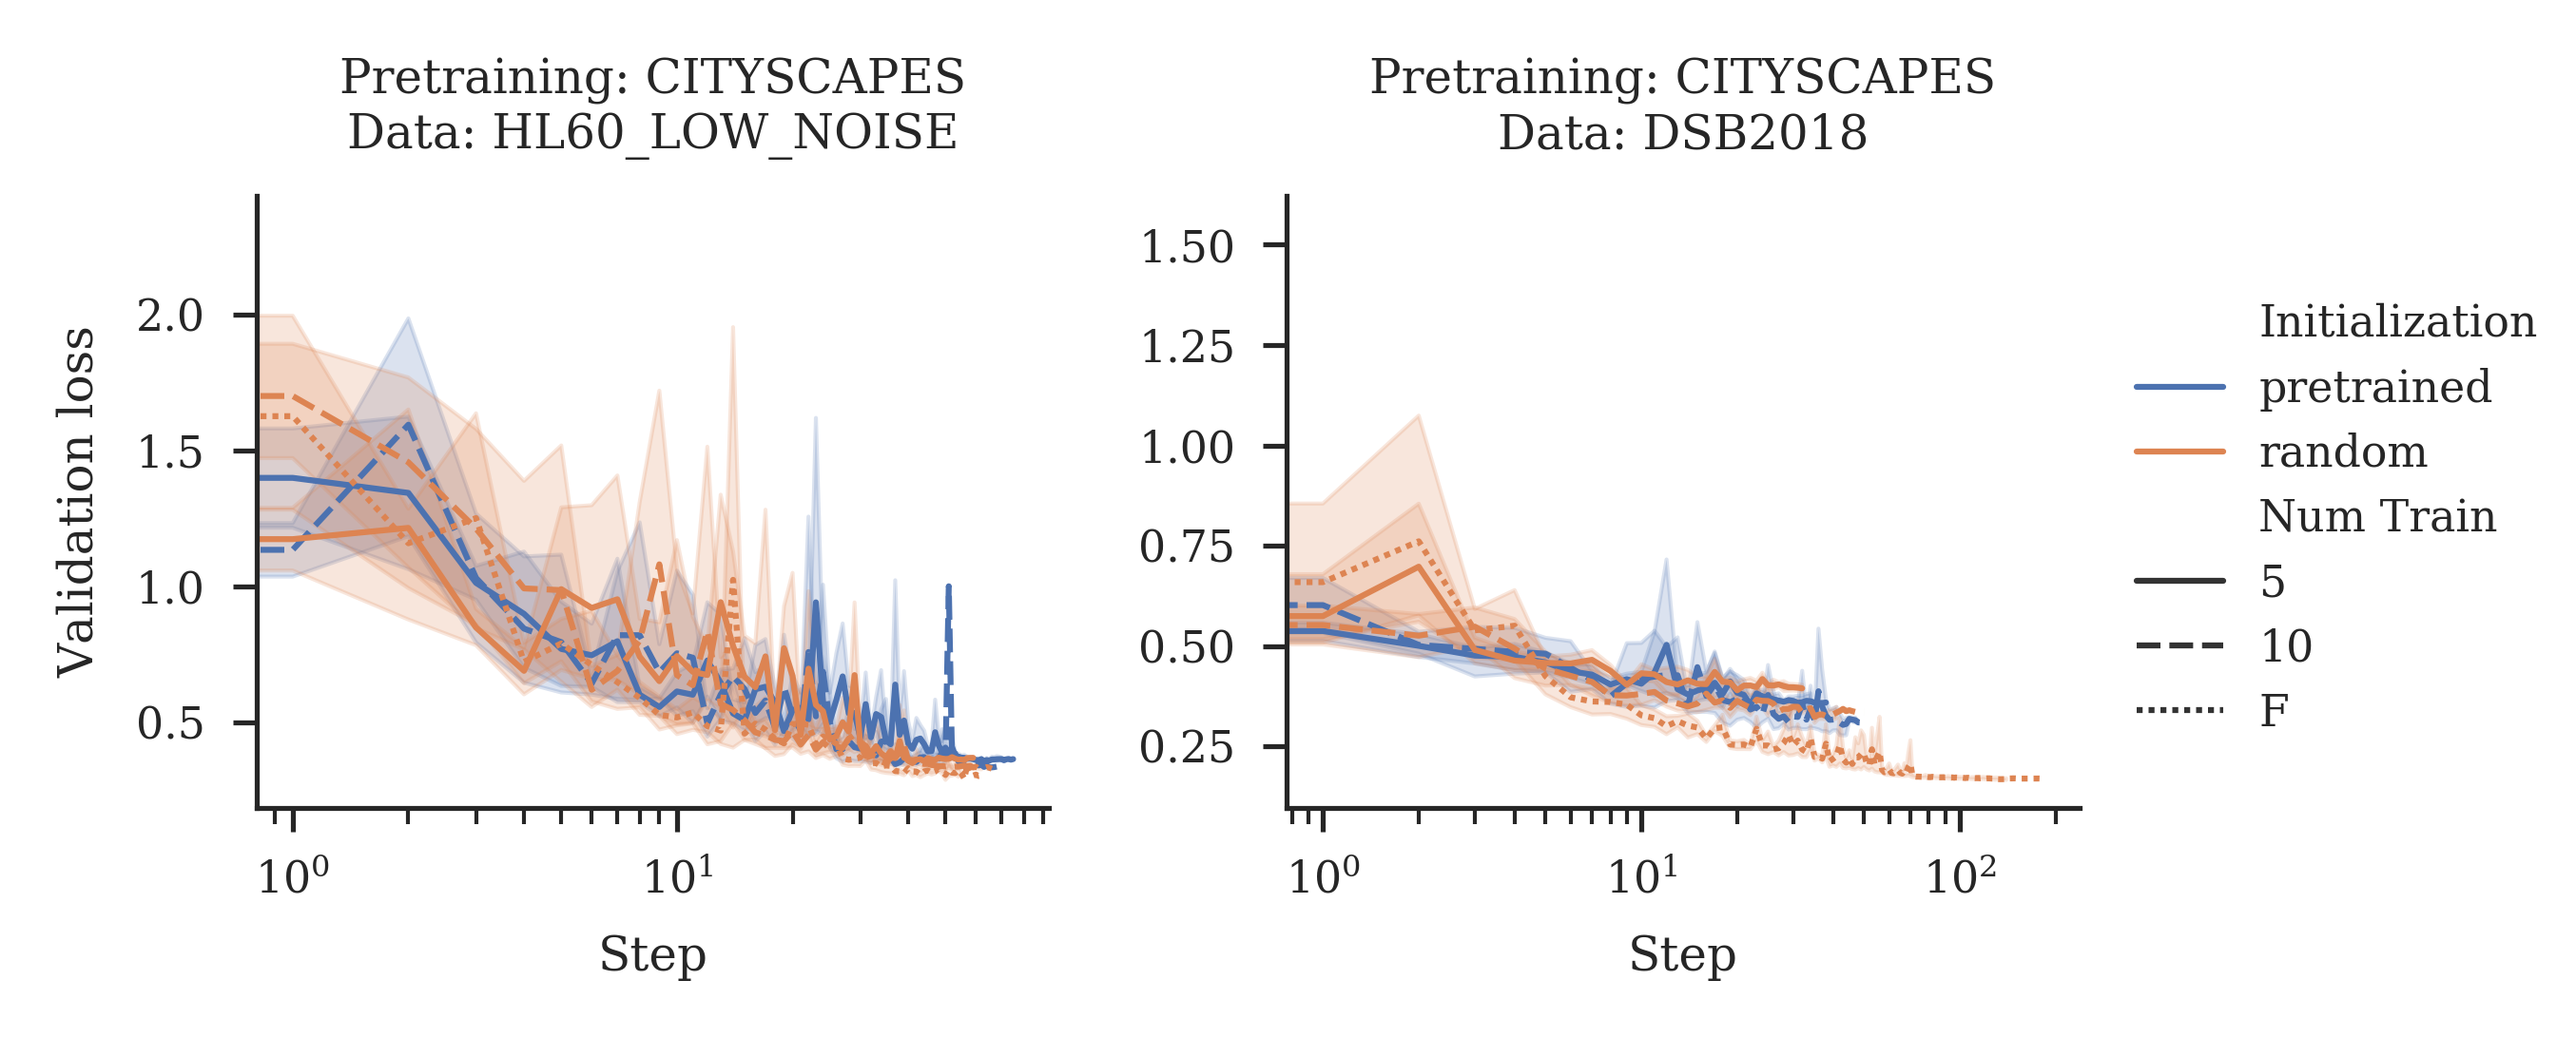

In [16]:
exps = [
    ('cityscapes', 'hl60low', 'stardist', 'resnet-unet'),
    ('cityscapes', 'dsb2018', 'stardist', 'resnet-unet'),
    # TODO include this experiment?
    #('imagenet', 'dsb2018', 'stardist', 'imagenet-resnet-unet'),
]
selected_models = visualize.get_models(exp_regex(exps))
history_df = visualize._get_model_histories_df(selected_models)

history_df = history_df[history_df['Num Train'].isin([5, 10, 'F'])]

# Fill pretrain dataset
df_1 = history_df[history_df['Backbone'] == 'resnet-unet'].fillna('cityscapes')
df_2 = history_df[history_df['Backbone'] == 'imagenet-resnet-unet'].fillna('imagenet')
history_df = df_1.append(df_2)

history_df = convert_to_categorical(history_df)
history_df = rename_datasets(history_df)
history_df = add_joined_data_col(history_df)
history_df['Validation loss'] = history_df['val_loss']


current_facetgrid_kwargs = dict(**facetgrid_kwargs)
# current_facetgrid_kwargs['aspect'] = 0.88
g = sns.FacetGrid(
    data=history_df,
    col='Joined Data',
    col_order=['Pretraining: CITYSCAPES\nData: HL60_LOW_NOISE',
               'Pretraining: CITYSCAPES\nData: DSB2018'],
    sharey=False, sharex=False, legend_out=True,
    **current_facetgrid_kwargs
)
g.map_dataframe(sns.lineplot, 'Step', 'Validation loss', style='Num Train', hue='Initialization')
plt.subplots_adjust(wspace=0.3)

g.set_titles(col_template = '{col_name}')
# Set the axis scales and lim
g.set(xscale='log')
#g.axes[0,0].set(ylim=(0.2, 1.7))
# g.axes[0,1].set(ylim=(0.2, 1.7))
# g.axes[0,2].set(ylim=(0.2, 1.2))

g.add_legend()

visualize.save(g, '/tmp/bachelorthesis-plots-tex/history_real.pdf')

## Pretrain on multiple datasets

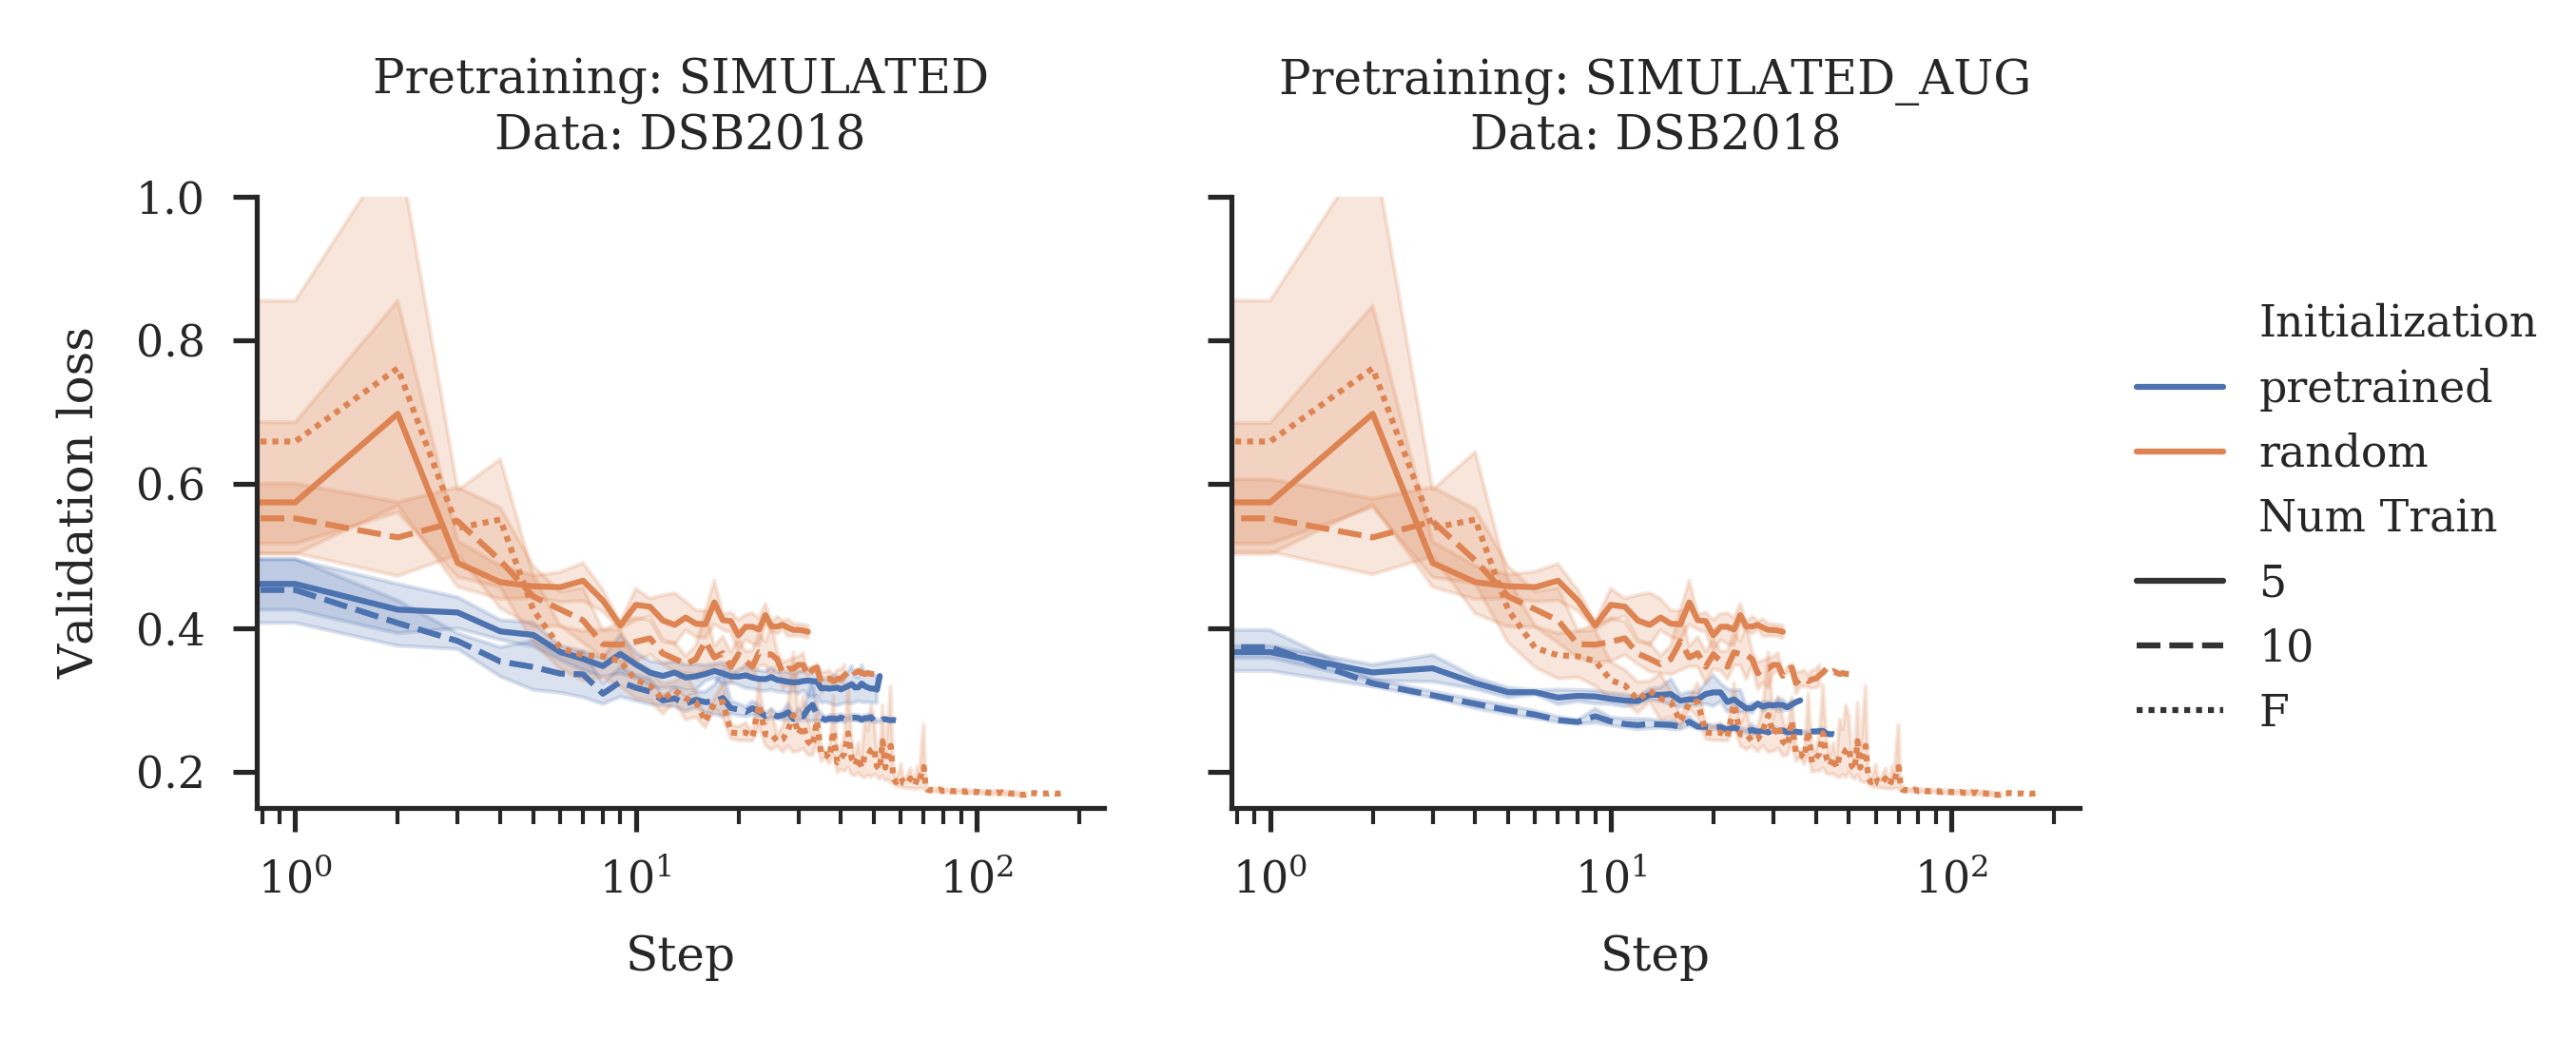

In [17]:
exps = [
    ('hl60low-granulocyte-aug', 'dsb2018', 'stardist', 'resnet-unet'),
    ('hl60low-hl60high-granulocyte', 'dsb2018', 'stardist', 'resnet-unet')
]
selected_models = visualize.get_models(exp_regex(exps))
history_df = visualize._get_model_histories_df(selected_models)

history_df = history_df[history_df['Num Train'].isin([5, 10, 'F'])]
history_df = fill_pretrain_data(history_df)
history_df = convert_to_categorical(history_df)
history_df = rename_datasets(history_df)
history_df = add_joined_data_col(history_df)
history_df['Validation loss'] = history_df['val_loss']


current_facetgrid_kwargs = dict(**facetgrid_kwargs)
g = sns.FacetGrid(
    data=history_df,
    col='Joined Data',
    col_order=['Pretraining: SIMULATED\nData: DSB2018',
               'Pretraining: SIMULATED_AUG\nData: DSB2018'],
    sharey=True, sharex=False, legend_out=True,
    **current_facetgrid_kwargs
)
g.map_dataframe(sns.lineplot, 'Step', 'Validation loss', style='Num Train', hue='Initialization')
plt.subplots_adjust(wspace=0.15)

g.set_titles(col_template = '{col_name}')
# Set the axis scales and lim
g.set(xscale='log')
g.axes[0,0].set(ylim=(0.15, 1))
g.axes[0,1].set(ylim=(0.15, 1))

g.add_legend()

visualize.save(g, '/tmp/bachelorthesis-plots-tex/history_mult.pdf')